In [50]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sb.set()

### Reading in data to dataframe

In [51]:
master = pd.read_csv('master.csv')
master.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### Data Cleaning

In [52]:
# Calculating total number of elderly in a country per year by adding male and female above 75 years
elderly = master.groupby(['age', 'country', 'year'])['population'].sum()['75+ years']
elderly = pd.DataFrame(elderly)
elderly = elderly.reset_index()
elderly.rename(columns={"population": "elderly"}, inplace=True)
elderly 

,country,year,elderly
0,Albania,1987,57400
1,Albania,1988,58700
2,Albania,1989,59500
3,Albania,1992,62600
4,Albania,1993,63500
...,...,...,...
2316,Uzbekistan,2010,519059
2317,Uzbekistan,2011,535618
2318,Uzbekistan,2012,552270
2319,Uzbekistan,2013,566182


In [53]:
# merging elderly into main dataframe
master = pd.merge(master,elderly['elderly'],left_index = True, right_index = True)
master 

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,elderly
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,57400
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,58700
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,59500
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,62600
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,63500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,Azerbaijan,2002,male,25-34 years,7,603300,1.16,Azerbaijan2002,NaN,"6,235,795,104",820,Generation X,519059
2317,Azerbaijan,2002,male,15-24 years,9,795800,1.13,Azerbaijan2002,NaN,"6,235,795,104",820,Millenials,535618
2318,Azerbaijan,2002,female,75+ years,1,89000,1.12,Azerbaijan2002,NaN,"6,235,795,104",820,Silent,552270
2319,Azerbaijan,2002,female,35-54 years,8,1096350,0.73,Azerbaijan2002,NaN,"6,235,795,104",820,Boomers,566182


In [67]:
newmaster = master.groupby(['country', 'year', 'gdp_per_capita ($)'], as_index = 'False').agg({'population': 'sum', 'suicides_no': 'sum'})
newmaster

population  suicides_no
country    year gdp_per_capita ($)                         
Albania    1987 796                    2709600           73
           1988 769                    2764300           63
           1989 833                    2803100           68
           1992 251                    2822500           47
           1993 437                    2807300           73
...                                        ...          ...
Azerbaijan 1998 631                    7044400           56
           1999 645                    7106400           54
           2000 711                    7415250           62
           2001 759                    7518000          317
           2002 820                    5098800           87

[194 rows x 2 columns]

In [70]:
newmaster['suicides/100k_pop'] = (newmaster['suicides_no'] *100000 / newmaster['population'])
newmaster = newmaster.round({'suicides/100k_pop': 2})
newmaster = newmaster.reset_index()
newmaster.rename(columns={"population": "Total_Population"}, inplace=True)

In [71]:
newmaster.head()

,country,year,gdp_per_capita ($),Total_Population,suicides_no,suicides/100k_pop
0,Albania,1987,796,2709600,73,2.69
1,Albania,1988,769,2764300,63,2.28
2,Albania,1989,833,2803100,68,2.43
3,Albania,1992,251,2822500,47,1.67
4,Albania,1993,437,2807300,73,2.60


In [72]:
newmaster['percentage of elderly(%)'] = (elderly['elderly']/newmaster['Total_Population'])*100
newmaster

,country,year,gdp_per_capita ($),Total_Population,suicides_no,suicides/100k_pop,percentage of elderly(%)
0,Albania,1987,796,2709600,73,2.69,2.118394
1,Albania,1988,769,2764300,63,2.28,2.123503
2,Albania,1989,833,2803100,68,2.43,2.122650
3,Albania,1992,251,2822500,47,1.67,2.217892
4,Albania,1993,437,2807300,73,2.60,2.261960
...,...,...,...,...,...,...,...
189,Azerbaijan,1998,631,7044400,56,0.79,1.896542
190,Azerbaijan,1999,645,7106400,54,0.76,1.896882
191,Azerbaijan,2000,711,7415250,62,0.84,1.635144
192,Azerbaijan,2001,759,7518000,317,4.22,1.696595


In [7]:
education = pd.read_csv('Education.csv')
education.drop('2016', inplace=True, axis=1)
education.drop('2017', inplace=True, axis=1)
education.drop('2018', inplace=True, axis=1)
education.drop('2019', inplace=True, axis=1)
education = (education.set_index(["Country"])
             .stack()
             .reset_index(name='Education index')
             .rename(columns={'level_1':'year'}))

education['year']=education['year'].astype('int64')

education


,Country,year,Education index
0,Afghanistan,1990,0.122
1,Afghanistan,1991,0.133
2,Afghanistan,1992,0.145
3,Afghanistan,1993,0.156
4,Afghanistan,1994,0.168
...,...,...,...
4395,Zimbabwe,2011,0.526
4396,Zimbabwe,2012,0.549
4397,Zimbabwe,2013,0.550
4398,Zimbabwe,2014,0.557


In [8]:
merged = pd.merge(newmaster,education,on=["Country","year"],how='left')
merged.head()

,Country,year,gdp_per_capita ($),Total_Population,suicides_no,suicides/100k_pop,percentage of elderly(%),Education index
0,Albania,1987,796,2709600,73,2.69,2.118394,NaN
1,Albania,1988,769,2764300,63,2.28,2.123503,NaN
2,Albania,1989,833,2803100,68,2.43,2.122650,NaN
3,Albania,1992,251,2822500,47,1.67,2.217892,0.557
4,Albania,1993,437,2807300,73,2.60,2.261960,0.542


In [9]:
merged.count()

Country                     2321
year                        2321
gdp_per_capita ($)          2321
Total_Population            2321
suicides_no                 2321
suicides/100k_pop           2321
percentage of elderly(%)    2321
Education index             1847
dtype: int64

In [10]:
inflation = pd.read_csv('inflation.csv')
inflation = inflation.reset_index(drop=True)
inflation.drop('Country Code', inplace=True, axis=1)
inflation.drop('Indicator Code', inplace=True, axis=1)
inflation.drop('Indicator Name', inplace=True, axis=1)
inflation.drop('2016', inplace=True, axis=1)
inflation.drop('2017', inplace=True, axis=1)
inflation.drop('2018', inplace=True, axis=1)
inflation.drop('2019', inplace=True, axis=1)
inflation.drop('2020', inplace=True, axis=1)
 
inflation = (inflation.set_index(["Country Name"])
             .stack()
             .reset_index(name='Inflation, consumer prices (annual %)')
             .rename(columns={'level_1':'year'}))

inflation = inflation.rename(columns={"Country Name": "Country"})
inflation['year']=inflation['year'].astype('int64')

inflation


,Country,year,"Inflation, consumer prices (annual %)"
0,Aruba,1990,5.836688
1,Aruba,1991,5.555556
2,Aruba,1992,3.873375
3,Aruba,1993,5.215560
4,Aruba,1994,6.311080
...,...,...,...
5630,Zimbabwe,2011,3.466130
5631,Zimbabwe,2012,3.725327
5632,Zimbabwe,2013,1.634950
5633,Zimbabwe,2014,-0.197785


In [11]:
merged = pd.merge(merged,inflation,on=["Country","year"],how='left')
merged = merged.rename(columns={'Education index':'Education Index','Inflation, consumer prices (annual %)':'Inflation Rate'})
merged

,Country,year,gdp_per_capita ($),Total_Population,suicides_no,suicides/100k_pop,percentage of elderly(%),Education Index,Inflation Rate
0,Albania,1987,796,2709600,73,2.69,2.118394,NaN,NaN
1,Albania,1988,769,2764300,63,2.28,2.123503,NaN,NaN
2,Albania,1989,833,2803100,68,2.43,2.122650,NaN,NaN
3,Albania,1992,251,2822500,47,1.67,2.217892,0.557,226.005421
4,Albania,1993,437,2807300,73,2.60,2.261960,0.542,85.004751
...,...,...,...,...,...,...,...,...,...
2316,Uzbekistan,2010,1533,25651783,1464,5.71,2.023481,0.674,NaN
2317,Uzbekistan,2011,1767,25978049,1640,6.31,2.061810,0.681,NaN
2318,Uzbekistan,2012,1964,26381830,1835,6.96,2.093373,0.692,NaN
2319,Uzbekistan,2013,2150,26838924,1950,7.27,2.109556,0.699,NaN


In [12]:
unemployment = pd.read_csv('unemployment.csv')
unemployment = unemployment.reset_index(drop=True)
unemployment.drop('Country Code', inplace=True, axis=1)
unemployment.drop('Indicator Code', inplace=True, axis=1)
unemployment.drop('Indicator Name', inplace=True, axis=1)
unemployment.drop('2016', inplace=True, axis=1)
unemployment.drop('2017', inplace=True, axis=1)
unemployment.drop('2018', inplace=True, axis=1)
unemployment.drop('2019', inplace=True, axis=1)
unemployment.drop('2020', inplace=True, axis=1)
unemployment = (unemployment.set_index(["Country Name"])
             .stack()
             .reset_index(name='Unemployment Rate')
             .rename(columns={'level_1':'year'}))
unemployment['Unemployment Rate'] = unemployment['Unemployment Rate'].replace(['0', 0], np.nan)

unemployment = unemployment.rename(columns={"Country Name": "Country"})
unemployment['year']=unemployment['year'].astype('int64')

unemployment

,Country,year,Unemployment Rate
0,Aruba,1990,NaN
1,Africa Eastern and Southern,1990,NaN
2,Africa Eastern and Southern,1991,7.797012
3,Africa Eastern and Southern,1992,7.838142
4,Africa Eastern and Southern,1993,7.849445
...,...,...,...
6136,Zimbabwe,2011,5.370000
6137,Zimbabwe,2012,5.153000
6138,Zimbabwe,2013,4.982000
6139,Zimbabwe,2014,4.770000


In [13]:
# merge unemployment data into main dataframe
merged = pd.merge(merged,unemployment,on=["Country","year"],how='left')
merged

,Country,year,gdp_per_capita ($),Total_Population,suicides_no,suicides/100k_pop,percentage of elderly(%),Education Index,Inflation Rate,Unemployment Rate
0,Albania,1987,796,2709600,73,2.69,2.118394,NaN,NaN,NaN
1,Albania,1988,769,2764300,63,2.28,2.123503,NaN,NaN,NaN
2,Albania,1989,833,2803100,68,2.43,2.122650,NaN,NaN,NaN
3,Albania,1992,251,2822500,47,1.67,2.217892,0.557,226.005421,30.014999
4,Albania,1993,437,2807300,73,2.60,2.261960,0.542,85.004751,25.257999
...,...,...,...,...,...,...,...,...,...,...
2316,Uzbekistan,2010,1533,25651783,1464,5.71,2.023481,0.674,NaN,5.400000
2317,Uzbekistan,2011,1767,25978049,1640,6.31,2.061810,0.681,NaN,5.000000
2318,Uzbekistan,2012,1964,26381830,1835,6.96,2.093373,0.692,NaN,4.900000
2319,Uzbekistan,2013,2150,26838924,1950,7.27,2.109556,0.699,NaN,4.900000


In [14]:
average = merged.groupby('Country').agg({'suicides/100k_pop':'mean','gdp_per_capita ($)':'mean','percentage of elderly(%)':'mean','Education Index':'mean','Inflation Rate':'mean','Unemployment Rate':'mean'}).reset_index()
average #average of each factor across the years

,Country,suicides/100k_pop,gdp_per_capita ($),percentage of elderly(%),Education Index,Inflation Rate,Unemployment Rate
0,Albania,3.137273,1859.045455,2.747816,0.594684,23.099078,17.873947
1,Antigua and Barbuda,0.541111,10448.185185,3.179196,0.665444,1.753879,NaN
2,Argentina,7.910645,7914.096774,4.312277,0.739000,NaN,11.297240
3,Armenia,2.475200,1886.680000,3.742146,0.683625,182.517678,11.537391
4,Aruba,8.096429,24221.642857,3.250227,NaN,3.405965,NaN
...,...,...,...,...,...,...,...
96,United Arab Emirates,1.751667,42162.000000,0.251356,0.645333,6.885036,2.804333
97,United Kingdom,7.883548,31908.354839,7.837895,0.827577,2.641087,6.937692
98,United States,12.835484,39269.612903,6.175107,0.868846,2.530718,6.099615
99,Uruguay,15.496071,7622.071429,6.017407,0.672478,19.345250,10.304091


In [ ]:
# Exporting the 2 dataframes to csv file to be used in machine learning in another notebook
merged.to_csv('merged.csv', index=False)
average.to_csv('average.csv', index=False)

## EDA

### Visualising average of factors across all countries in dataset

#### Average Suicide Rates

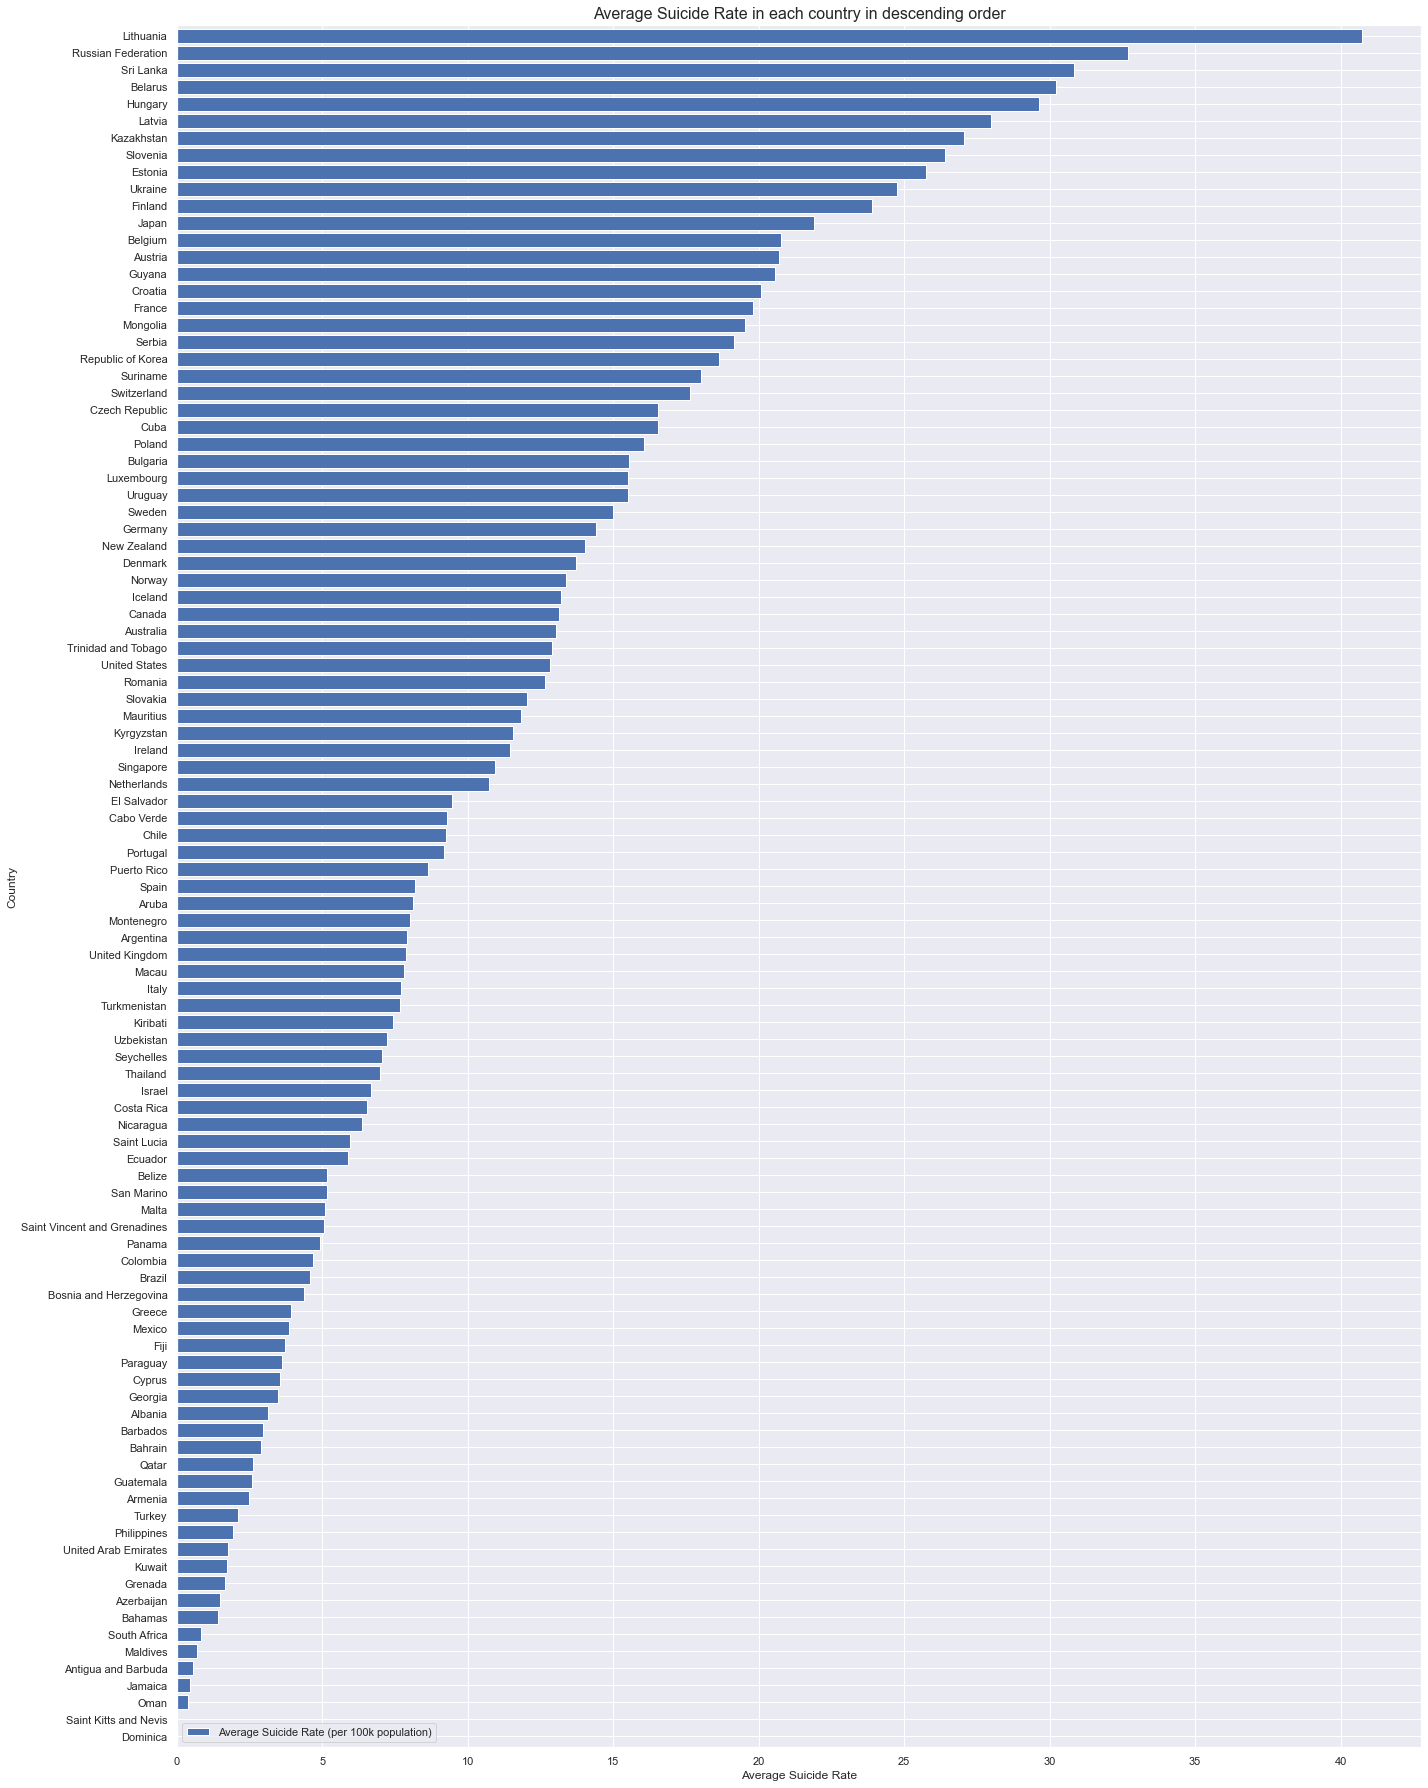

In [15]:
average.sort_values('suicides/100k_pop',ascending=True,inplace=True)
suicide_rate = average.dropna(subset=['suicides/100k_pop'])
fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(1,1,1)
suicide_rate.plot(kind = 'barh',x='Country',y='suicides/100k_pop', ax=ax1, stacked=True,width=0.8)
ax1.set_title('Average Suicide Rate in each country in descending order', fontsize=16)
ax1.set_ylabel('Country')
ax1.set_xlabel('Average Suicide Rate')
ax1.set_yticklabels(suicide_rate['Country'])
ax1.legend(['Average Suicide Rate (per 100k population)'])

plt.tight_layout()
plt.show()

#### Average GDP per capita

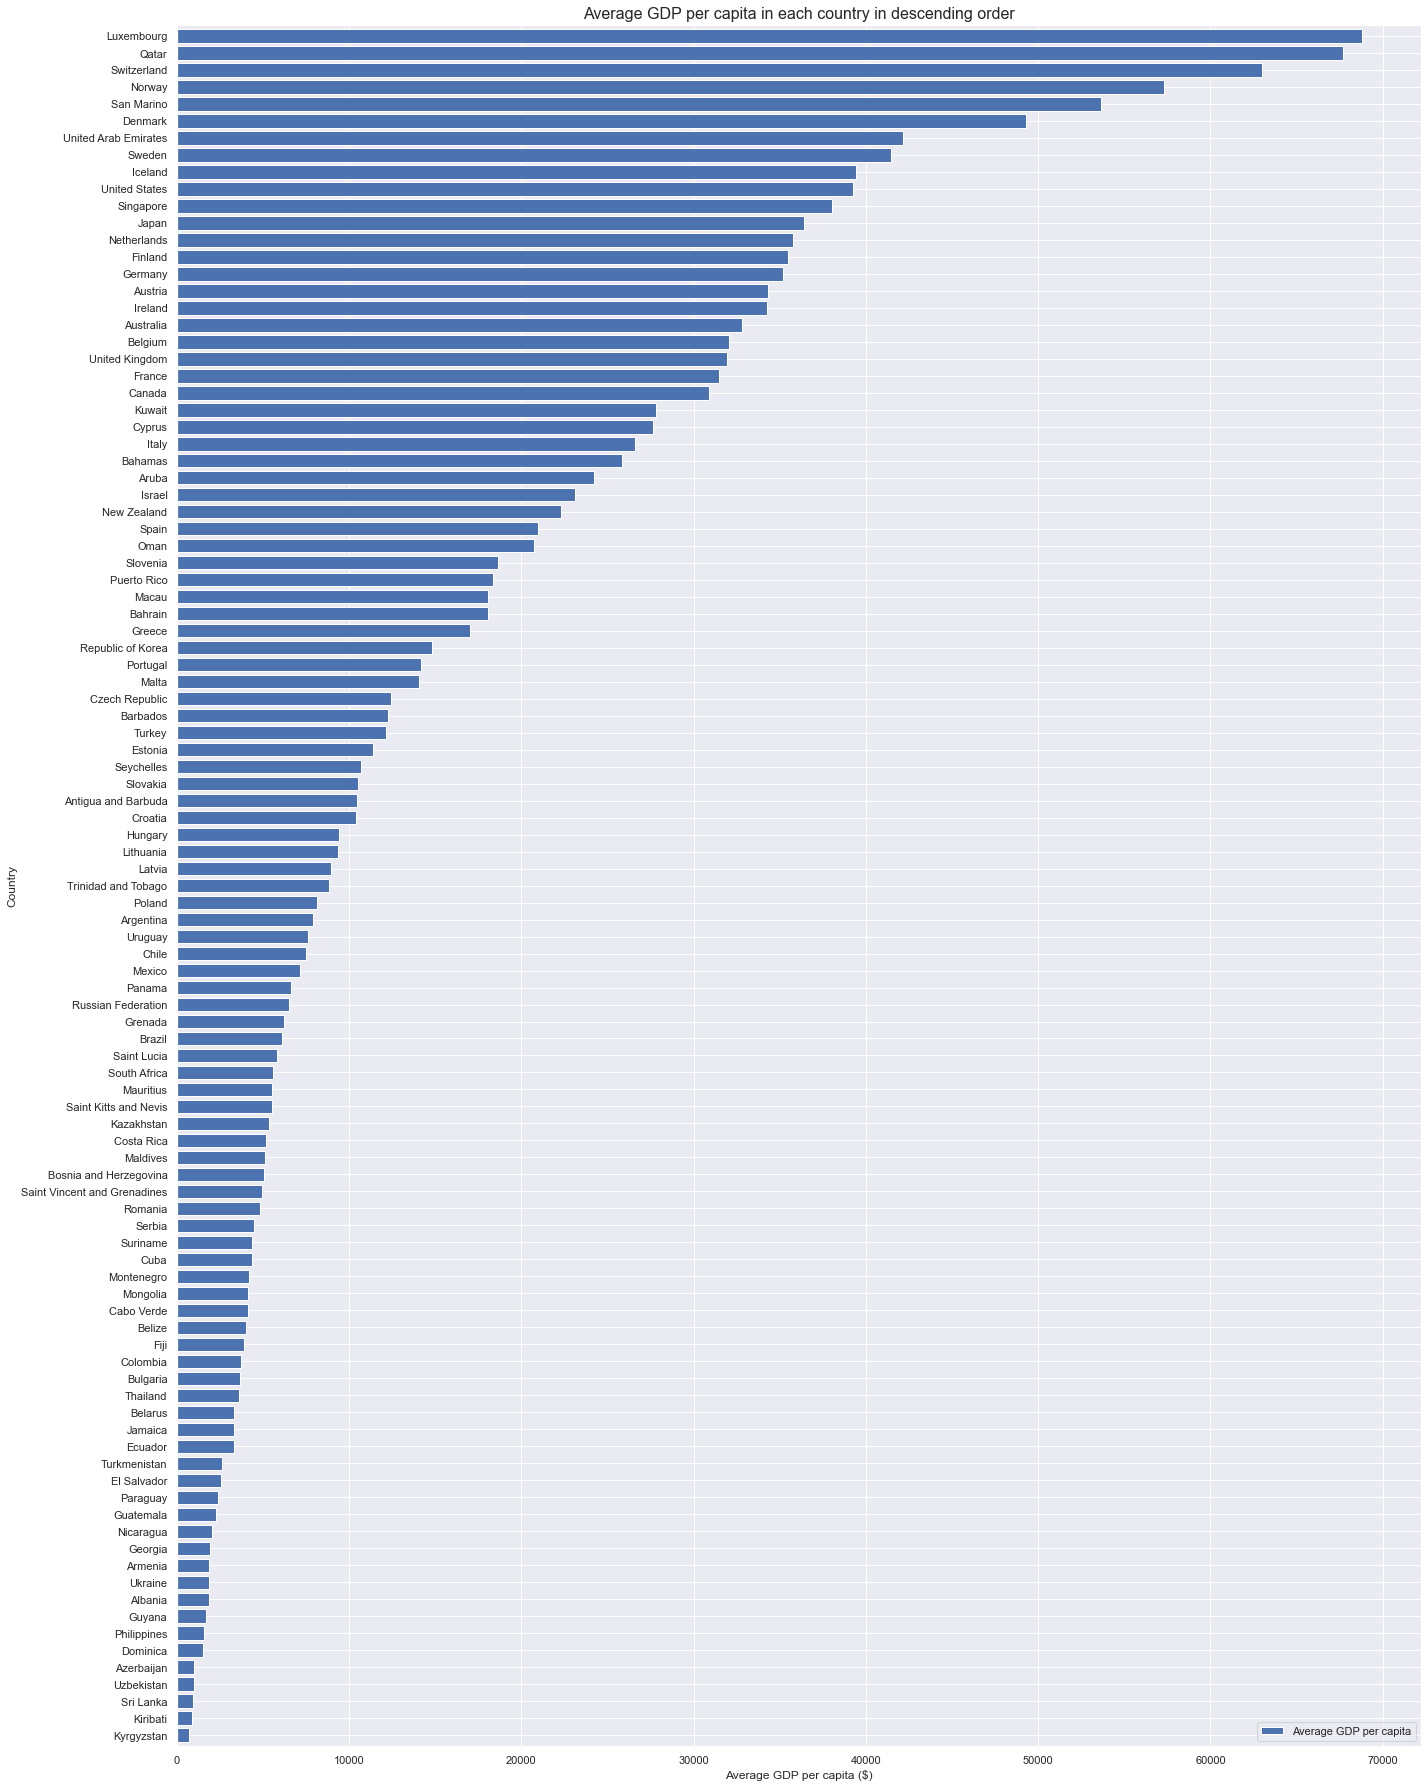

In [16]:
average.sort_values('gdp_per_capita ($)',ascending=True,inplace=True)
gdp = average.dropna(subset=['gdp_per_capita ($)'])
fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(1,1,1)
gdp.plot(kind = 'barh',x='Country',y='gdp_per_capita ($)', ax=ax1, stacked=True,width=0.8)
ax1.set_title('Average GDP per capita in each country in descending order', fontsize=16)
ax1.set_xlabel('Average GDP per capita ($)')
ax1.set_ylabel('Country')
ax1.set_yticklabels(gdp['Country'])
ax1.legend(['Average GDP per capita'])

plt.tight_layout()
plt.show()

#### Average Percentage of Elderly

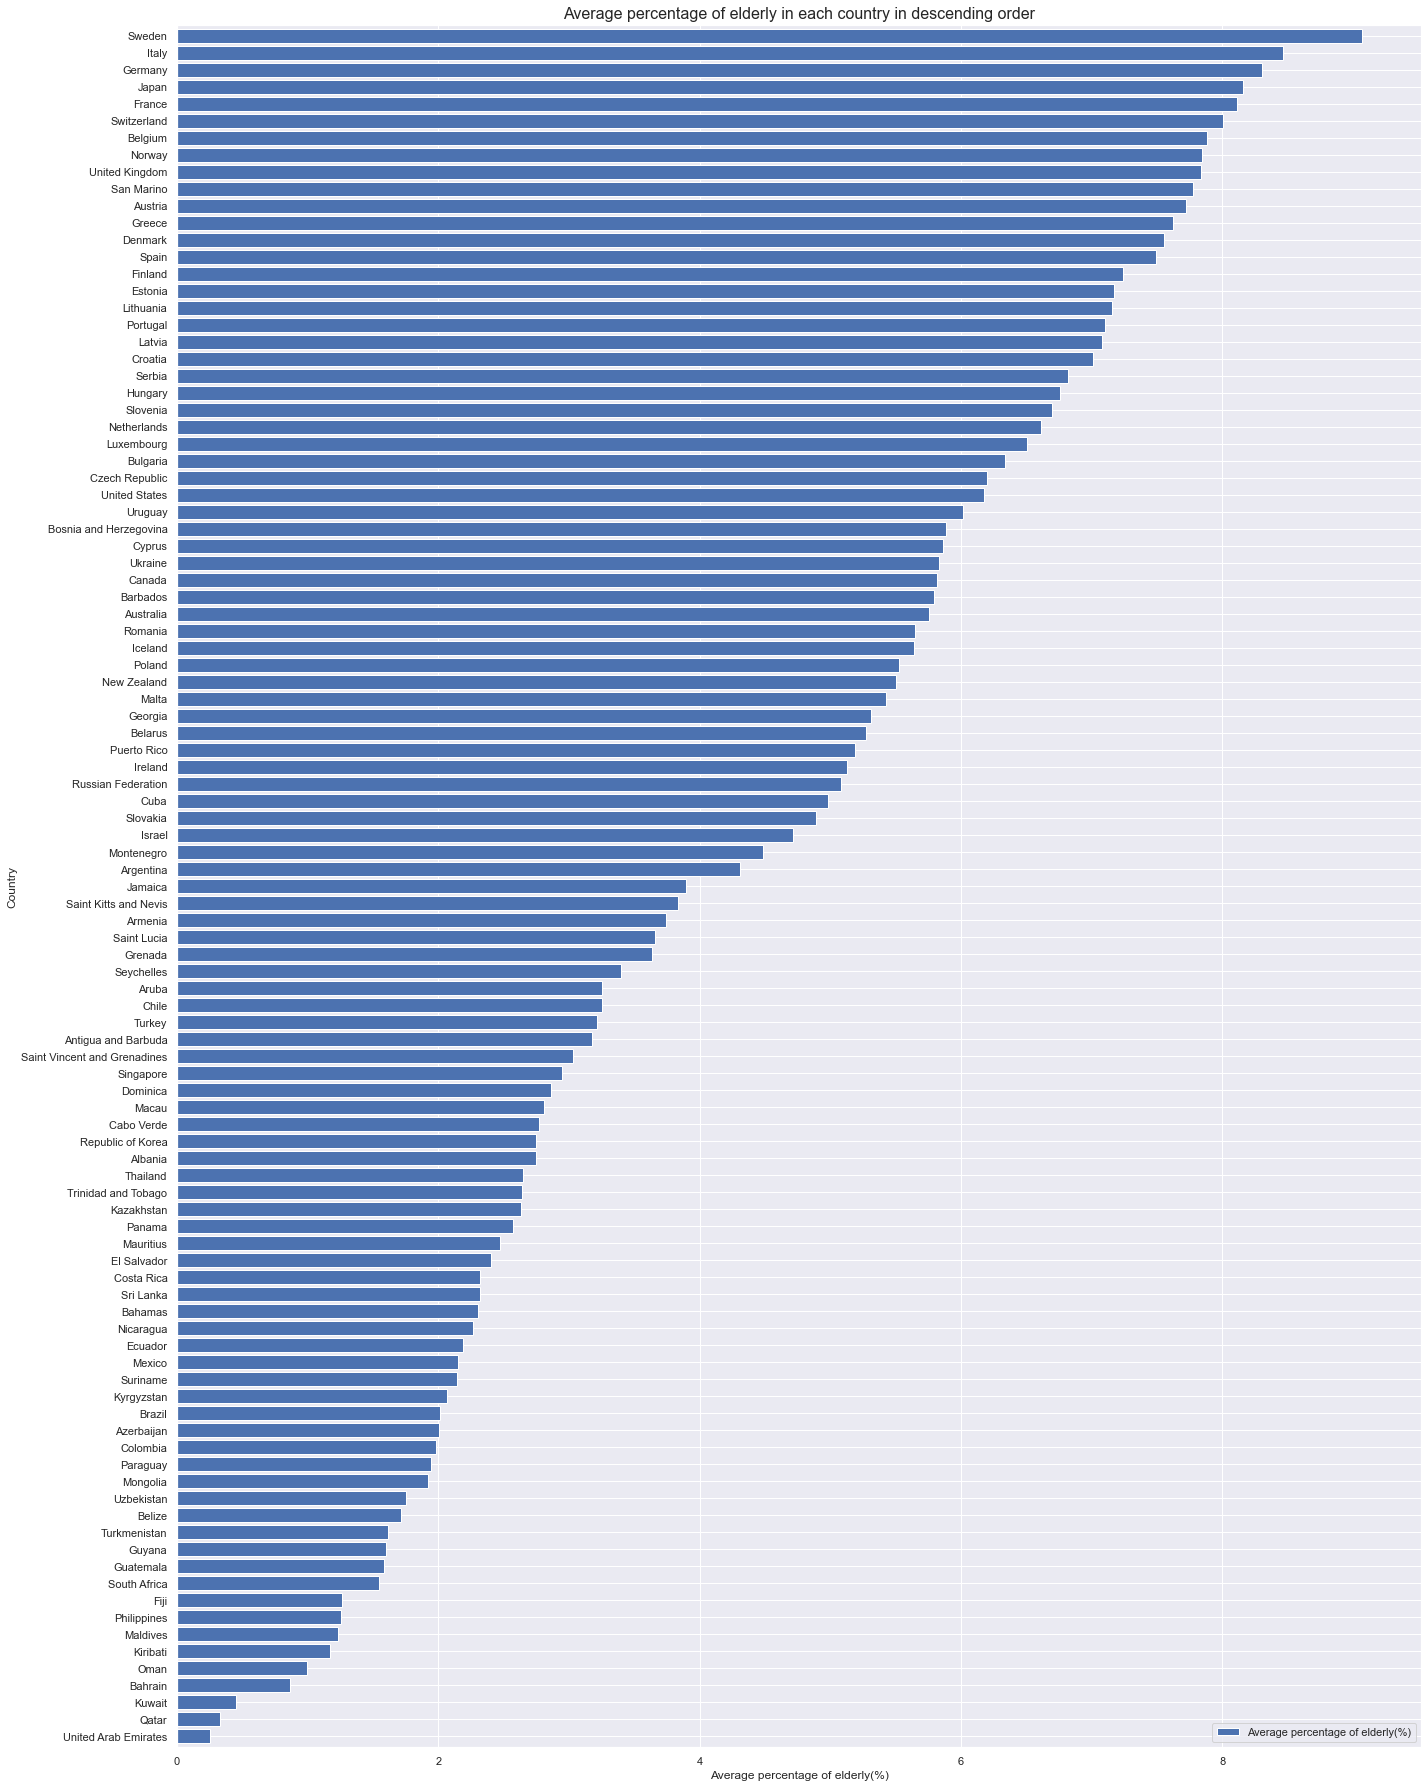

In [17]:
average.sort_values('percentage of elderly(%)',ascending=True,inplace=True)
elderly = average.dropna(subset=['percentage of elderly(%)'])
fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(1,1,1)
elderly.plot(kind = 'barh',x='Country',y='percentage of elderly(%)', ax=ax1, stacked=True,width=0.8)
ax1.set_title('Average percentage of elderly in each country in descending order', fontsize=16)
ax1.set_xlabel('Average percentage of elderly(%)')
ax1.set_ylabel('Country')
ax1.set_yticklabels(elderly['Country'])
ax1.legend(['Average percentage of elderly(%)'])

plt.tight_layout()
plt.show()

#### Average Education Index

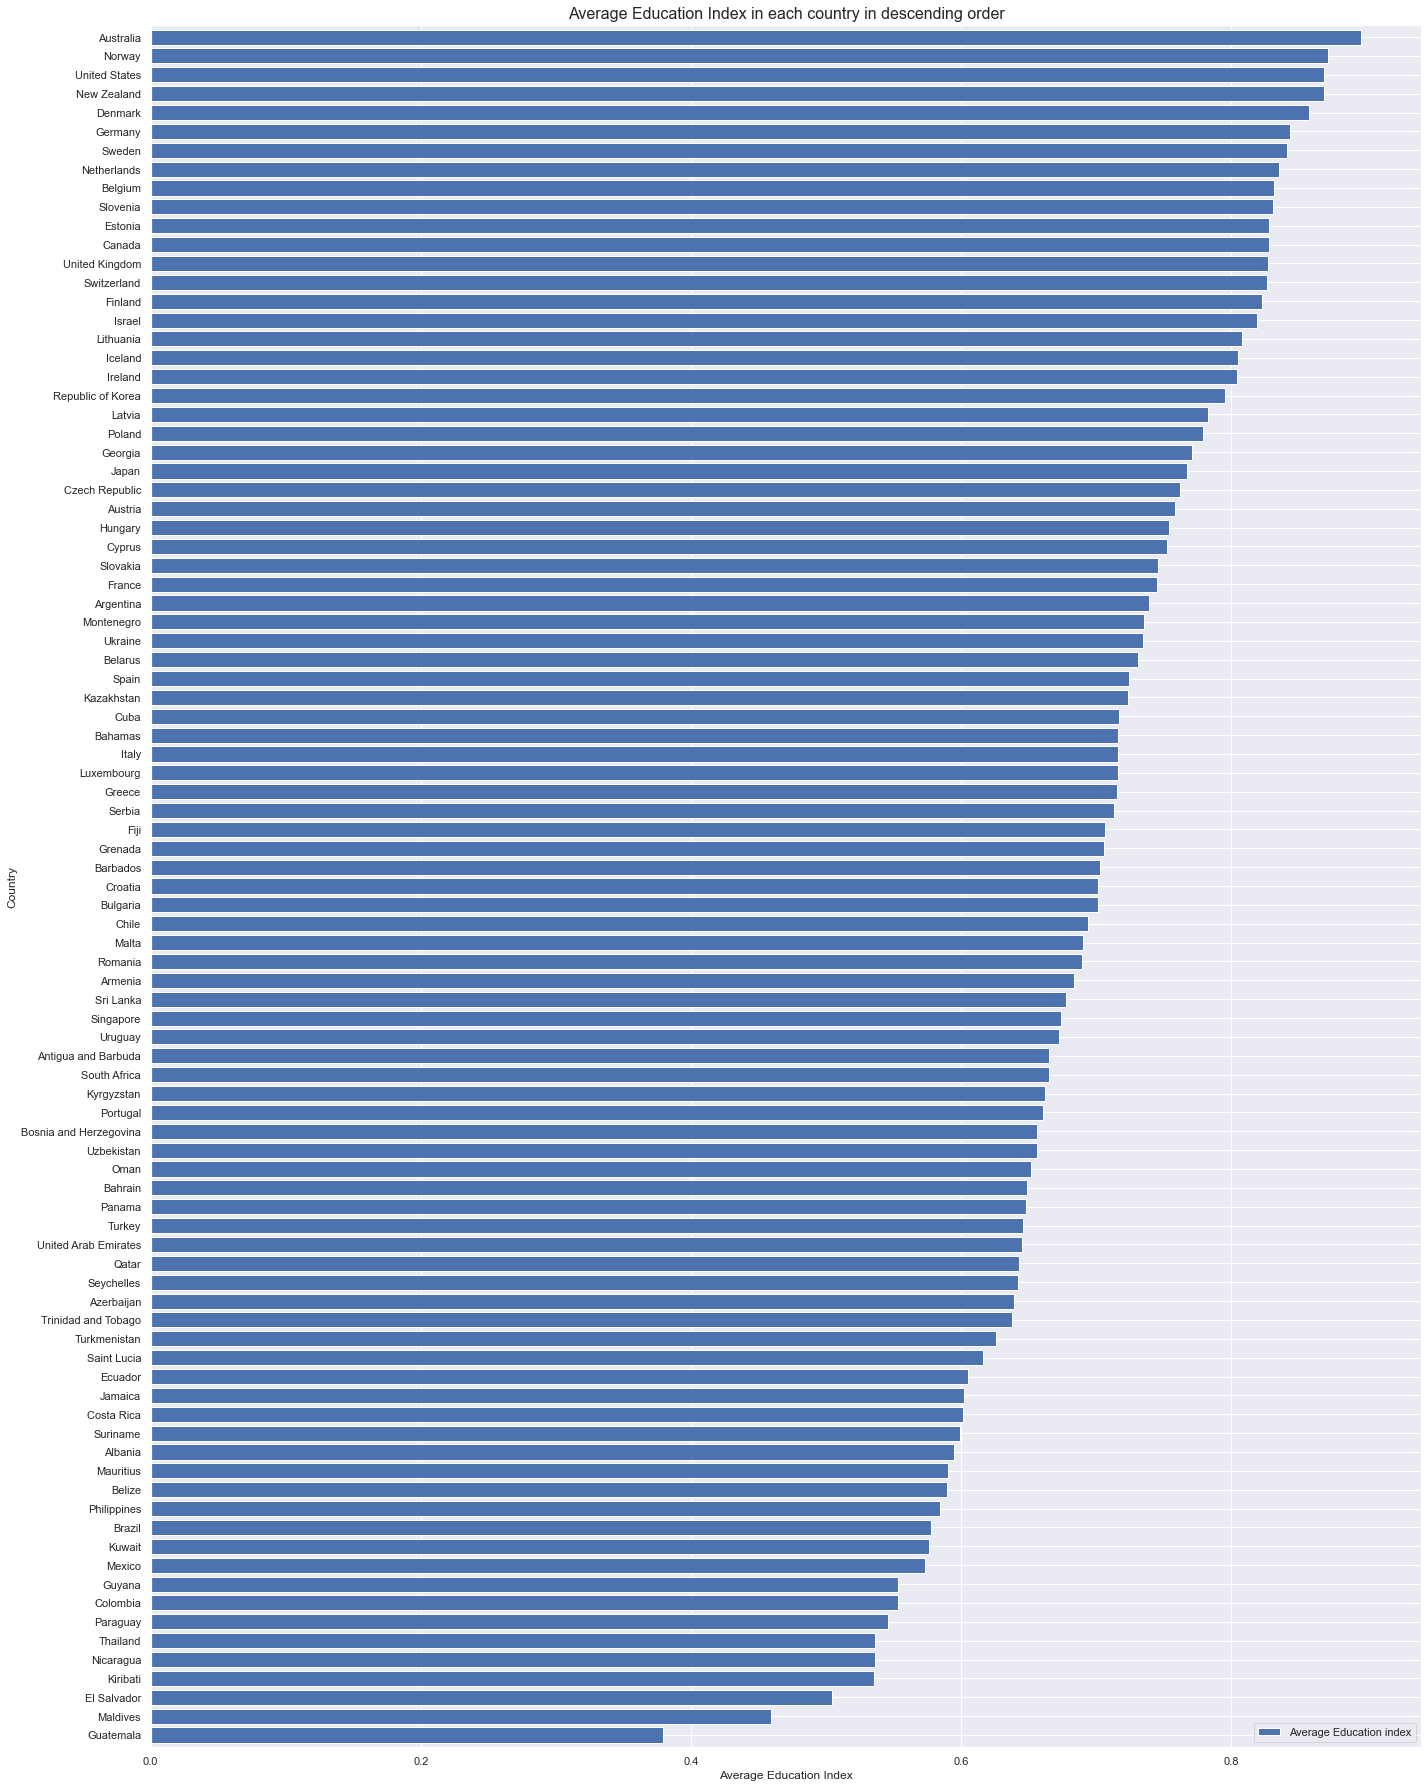

In [18]:
average.sort_values('Education Index',ascending=True,inplace=True)
education_index = average.dropna(subset=['Education Index'])
fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(1,1,1)
education_index.plot(kind = 'barh',x='Country',y='Education Index', ax=ax1, stacked=True,width=0.8)
ax1.set_title('Average Education Index in each country in descending order', fontsize=16)
ax1.set_xlabel('Average Education Index')
ax1.set_ylabel('Country')
ax1.set_yticklabels(education_index['Country'])
ax1.legend(['Average Education index'])

plt.tight_layout()
plt.show()

#### Average Inflation Rate

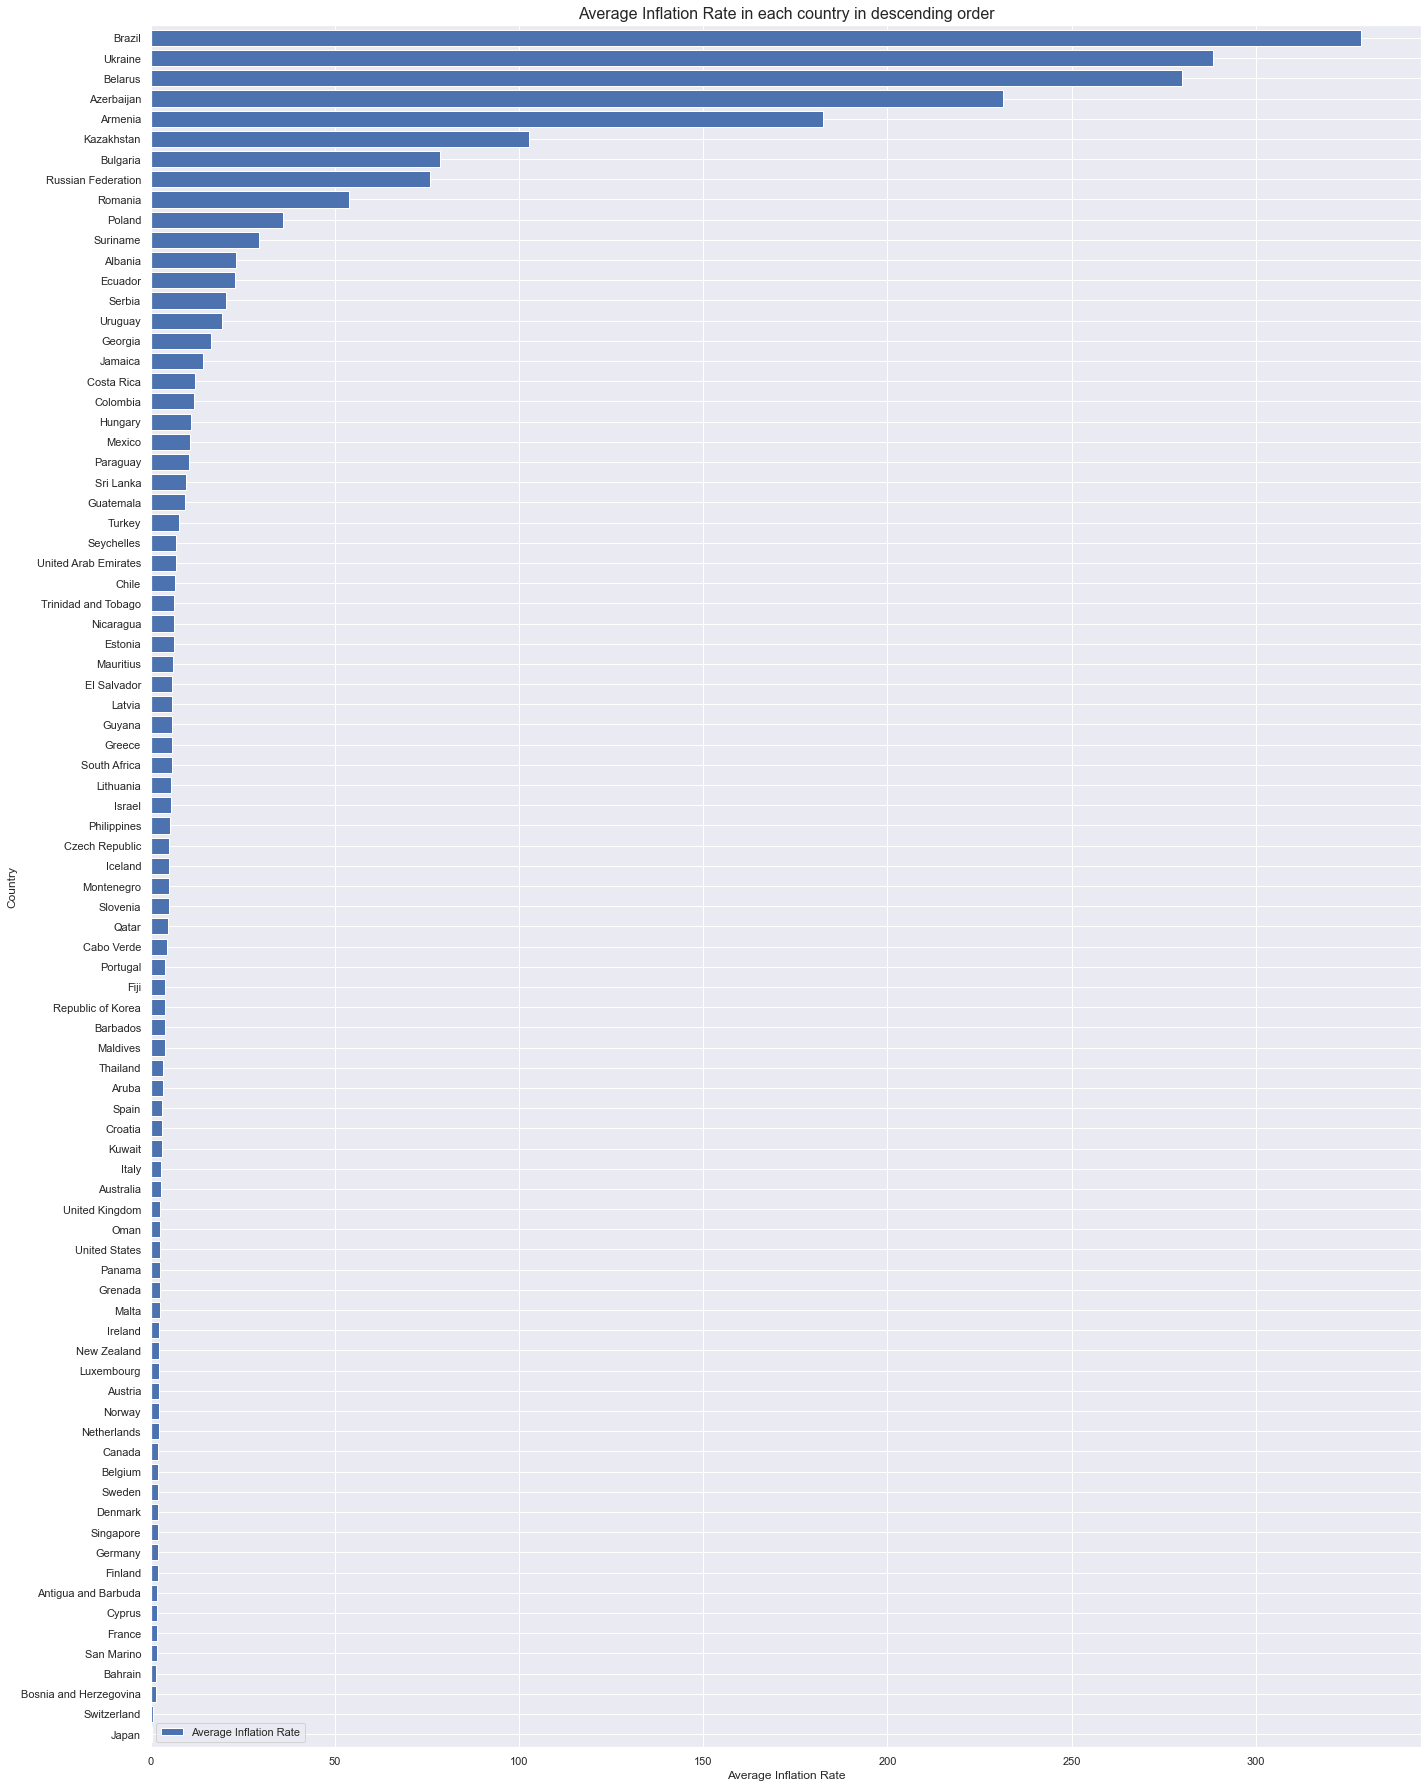

In [19]:
average.sort_values('Inflation Rate',ascending=True,inplace=True)
inflation_rate = average.dropna(subset=['Inflation Rate'])
fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(1,1,1)
inflation_rate.plot(kind = 'barh',x='Country',y='Inflation Rate', ax=ax1, stacked=True,width=0.8)
ax1.set_title('Average Inflation Rate in each country in descending order', fontsize=16)
ax1.set_xlabel('Average Inflation Rate')
ax1.set_ylabel('Country')
ax1.set_yticklabels(inflation_rate['Country'])
ax1.legend(['Average Inflation Rate'])

plt.tight_layout()
plt.show()

#### Average Unemployment Rate

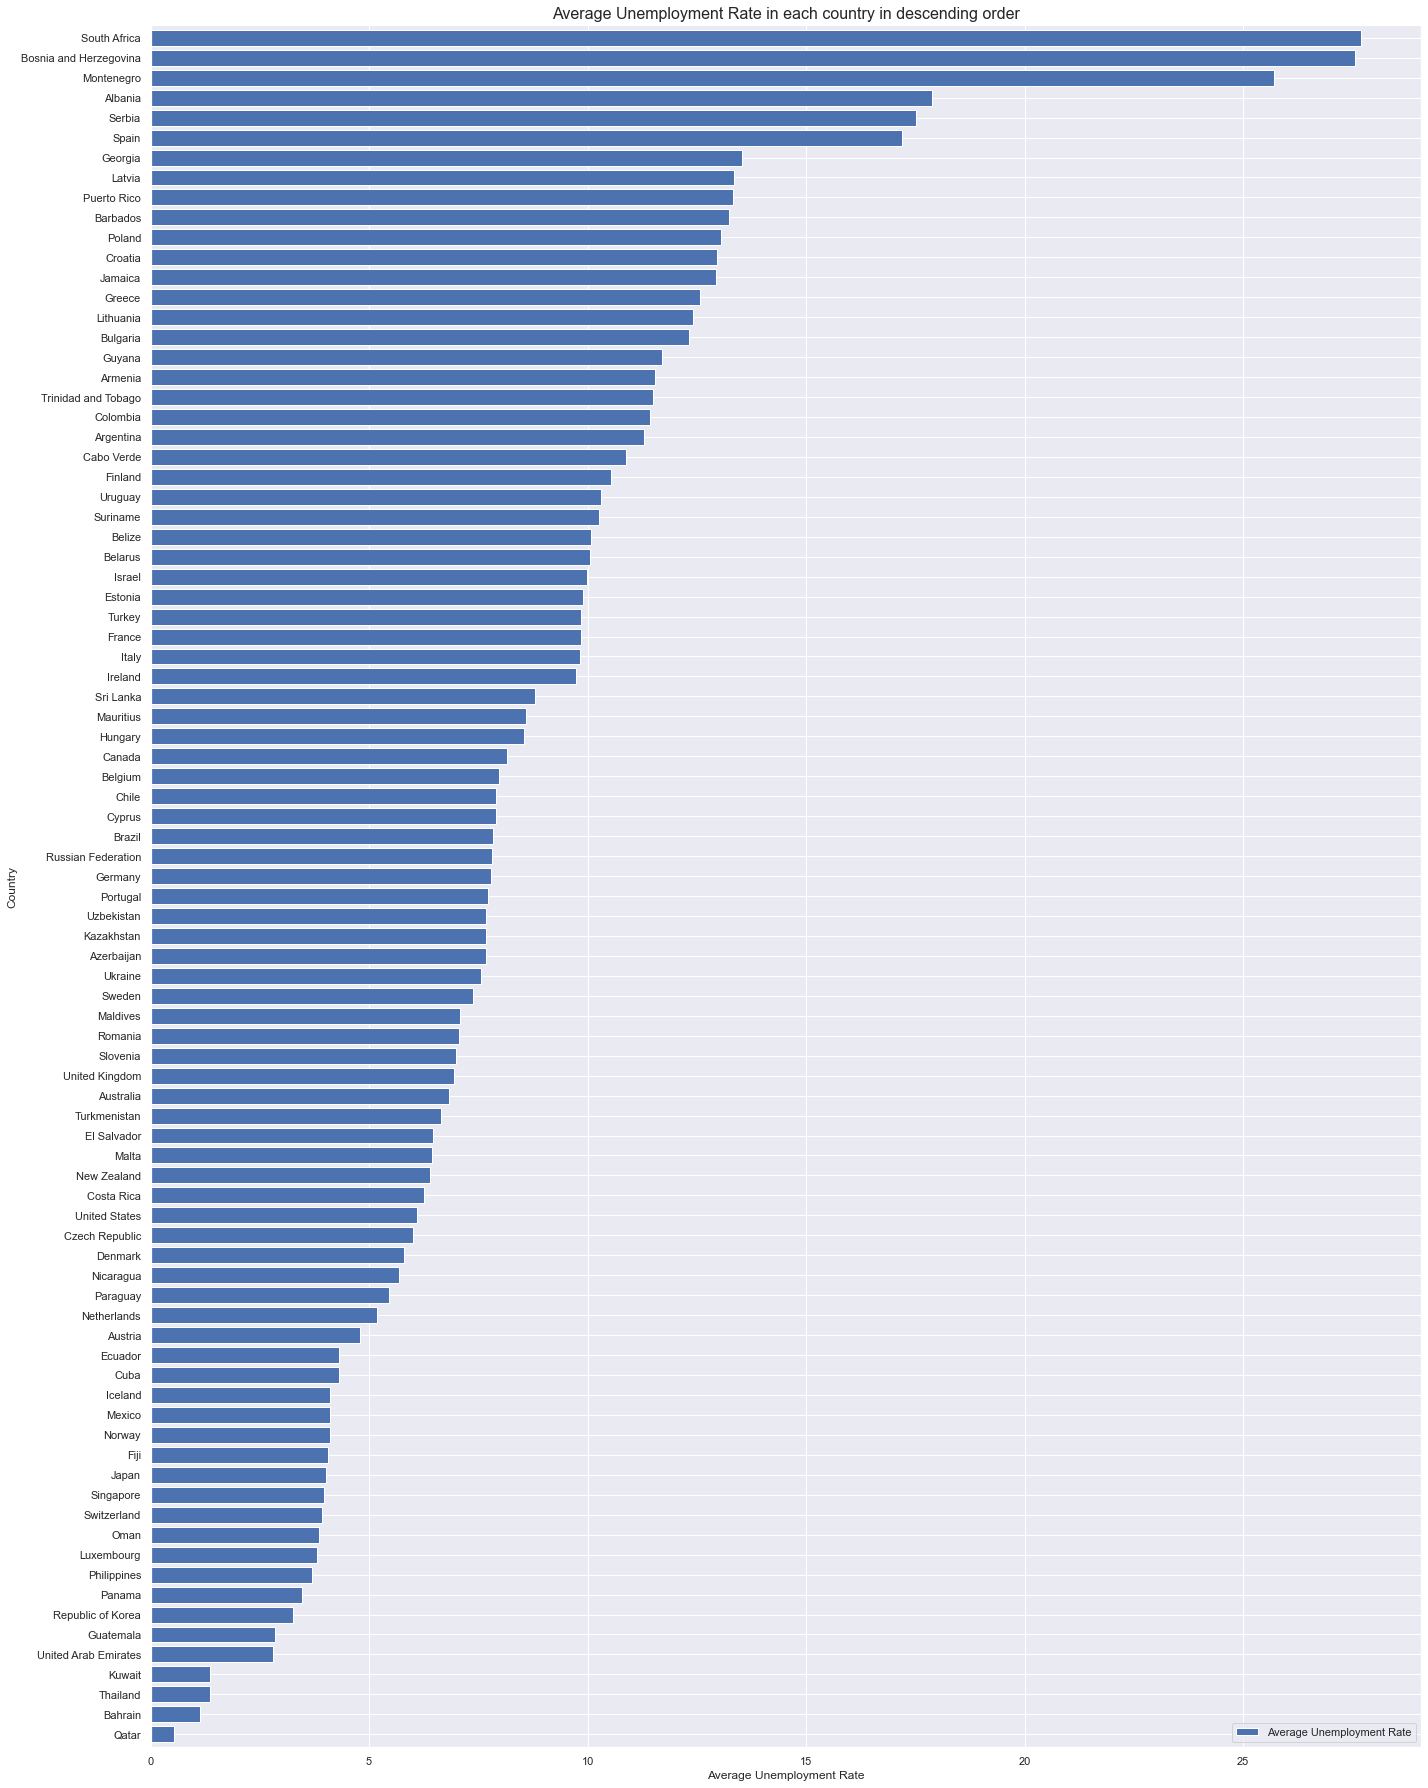

In [20]:
average.sort_values('Unemployment Rate',ascending=True,inplace=True)
unemployment_rate = average.dropna(subset=['Unemployment Rate'])
fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(1,1,1)
unemployment_rate.plot(kind = 'barh',x='Country',y='Unemployment Rate', ax=ax1, stacked=True,width=0.8)
ax1.set_title('Average Unemployment Rate in each country in descending order', fontsize=16)
ax1.set_xlabel('Average Unemployment Rate')
ax1.set_ylabel('Country')
ax1.set_yticklabels(unemployment_rate['Country'])
ax1.legend(['Average Unemployment Rate'])

plt.tight_layout()
plt.show()

### Chosing 10 countries with varying levels of each factor

In [21]:
#Brazil, Colombia, Ecuador,Sri Lanka,Korea,Singapore,South Africa,Sweden,UK,USA
brazil = merged[merged['Country']=='Brazil']
colombia = merged[merged['Country']=='Colombia']
ecuador = merged[merged['Country']=='Ecuador']
sri_lanka = merged[merged['Country']=='Sri Lanka']
korea = merged[merged['Country']=='Republic of Korea']
singapore = merged[merged['Country']=='Singapore']
south_africa = merged[merged['Country']=='South Africa']
sweden = merged[merged['Country']=='Sweden']
UK = merged[merged['Country']=='United Kingdom']
USA = merged[merged['Country']=='United States']

### Plotting trends of the factors and suicide rates for the 10 countries

#### Trends of Suicide Rates

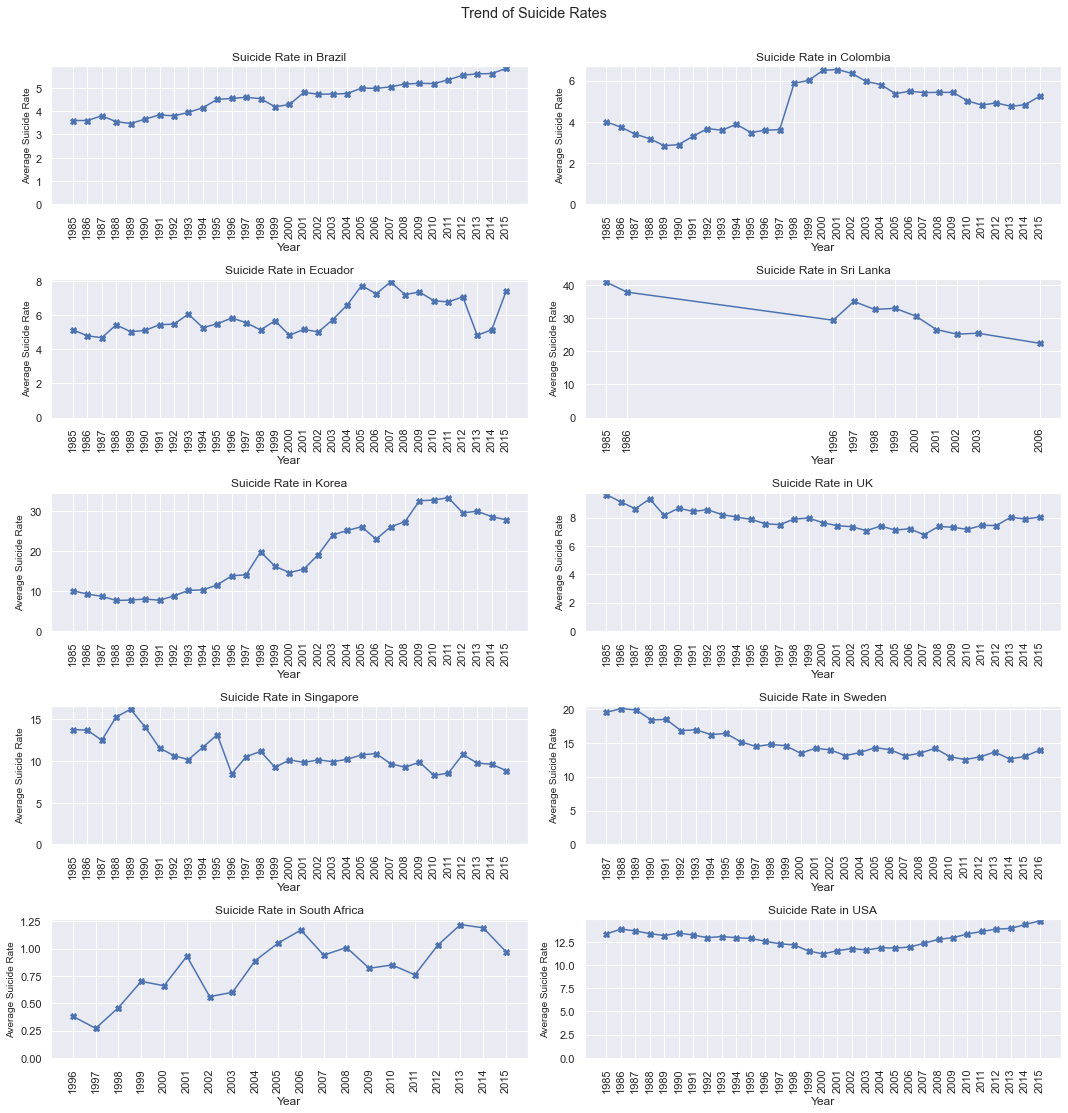

In [22]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(5,2,1)
brazil.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax1, marker = 'X')
ax1.set_title('Suicide Rate in Brazil')
ax1.set_ylabel('Average Suicide Rate', fontsize=10)
ax1.set_xlabel('Year')
ax1.set_xticks(brazil['year'])
ax1.set_xticklabels(brazil['year'], rotation=90)
ax1.get_legend().remove()
ax1.set_ylim(ymin=0)

ax2 = fig.add_subplot(5,2,2)
colombia.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax2, marker = 'X')
ax2.set_title('Suicide Rate in Colombia')
ax2.set_ylabel('Average Suicide Rate', fontsize=10)
ax2.set_xlabel('Year')
ax2.set_xticks(colombia['year'])
ax2.set_xticklabels(colombia['year'], rotation=90) 
ax2.get_legend().remove()
ax2.set_ylim(ymin=0)

ax3 = fig.add_subplot(5,2,3)
ecuador.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax3, marker = 'X')
ax3.set_title('Suicide Rate in Ecuador')
ax3.set_ylabel('Average Suicide Rate', fontsize=10)
ax3.set_xlabel('Year')
ax3.set_xticks(ecuador['year'])
ax3.set_xticklabels(ecuador['year'], rotation=90) 
ax3.get_legend().remove()
ax3.set_ylim(ymin=0)

ax4 = fig.add_subplot(5,2,4)
sri_lanka.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax4, marker = 'X')
ax4.set_title('Suicide Rate in Sri Lanka')
ax4.set_ylabel('Average Suicide Rate', fontsize=10)
ax4.set_xlabel('Year')
ax4.set_xticks(sri_lanka['year'])
ax4.set_xticklabels(sri_lanka['year'], rotation=90) 
ax4.get_legend().remove()
ax4.set_ylim(ymin=0)

ax5 = fig.add_subplot(5,2,5)
korea.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax5, marker = 'X')
ax5.set_title('Suicide Rate in Korea')
ax5.set_ylabel('Average Suicide Rate', fontsize=10)
ax5.set_xlabel('Year')
ax5.set_xticks(korea['year'])
ax5.set_xticklabels(korea['year'], rotation=90)
ax5.get_legend().remove()
ax5.set_ylim(ymin=0)

ax6 = fig.add_subplot(5,2,7)
singapore.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax6, marker = 'X')
ax6.set_title('Suicide Rate in Singapore')
ax6.set_ylabel('Average Suicide Rate', fontsize=10)
ax6.set_xlabel('Year')
ax6.set_xticks(singapore['year'])
ax6.set_xticklabels(singapore['year'], rotation=90)
ax6.get_legend().remove()
ax6.set_ylim(ymin=0)

ax7 = fig.add_subplot(5,2,9)
south_africa.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax7, marker = 'X')
ax7.set_title('Suicide Rate in South Africa')
ax7.set_ylabel('Average Suicide Rate', fontsize=10)
ax7.set_xlabel('Year')
ax7.set_xticks(south_africa['year'])
ax7.set_xticklabels(south_africa['year'], rotation=90)
ax7.get_legend().remove()
ax7.set_ylim(ymin=0)

ax8 = fig.add_subplot(5,2,8)
sweden.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax8, marker = 'X')
ax8.set_title('Suicide Rate in Sweden')
ax8.set_ylabel('Average Suicide Rate', fontsize=10)
ax8.set_xlabel('Year')
ax8.set_xticks(sweden['year'])
ax8.set_xticklabels(sweden['year'], rotation=90)
ax8.get_legend().remove()
ax8.set_ylim(ymin=0)

ax9 = fig.add_subplot(5,2,6)
UK.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax9, marker = 'X')
ax9.set_title('Suicide Rate in UK')
ax9.set_ylabel('Average Suicide Rate', fontsize=10)
ax9.set_xlabel('Year')
ax9.set_xticks(UK['year'])
ax9.set_xticklabels(UK['year'], rotation=90)
ax9.get_legend().remove()
ax9.set_ylim(ymin=0)

ax10 = fig.add_subplot(5,2,10)
USA.plot(kind = 'line',x='year',y='suicides/100k_pop', ax=ax10, marker = 'X')
ax10.set_title('Suicide Rate in USA')
ax10.set_ylabel('Average Suicide Rate', fontsize=10)
ax10.set_xlabel('Year')
ax10.set_xticks(USA['year'])
ax10.set_xticklabels(USA['year'], rotation=90)
ax10.get_legend().remove()
ax10.set_ylim(ymin=0)

plt.tight_layout() #so that the labels does not overlap each other
plt.suptitle('Trend of Suicide Rates',y=1.03)
plt.show()

### Comparing the different factors for the 10 countries chosen with a normalised graph and heatmap

#### Brazil

Text(0.5, 0, 'year')

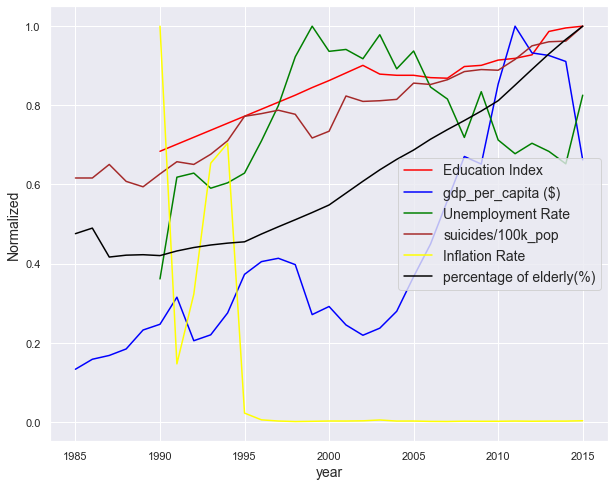

In [23]:
plt.figure(figsize=(10, 8))

plt.plot(brazil['year'], brazil['Education Index']/brazil['Education Index'].max(), color='red')
plt.plot(brazil['year'], brazil['gdp_per_capita ($)']/brazil['gdp_per_capita ($)'].max(), color='blue')
plt.plot(brazil['year'], brazil['Unemployment Rate']/brazil['Unemployment Rate'].max(), color='green')
plt.plot(brazil['year'], brazil['suicides/100k_pop']/brazil['suicides/100k_pop'].max(), color='brown')
plt.plot(brazil['year'], brazil['Inflation Rate']/brazil['Inflation Rate'].max(), color='yellow')
plt.plot(brazil['year'], brazil['percentage of elderly(%)']/brazil['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

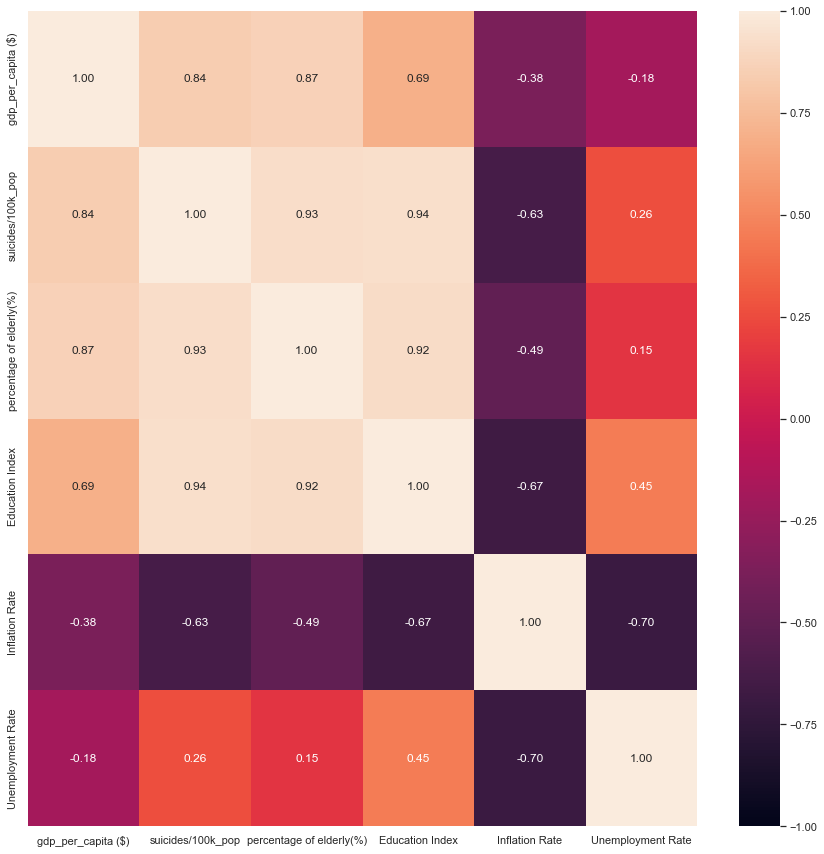

In [24]:
brazil['Education Index'] = brazil['Education Index']/brazil['Education Index'].max()
brazil['gdp_per_capita ($)'] = brazil['gdp_per_capita ($)']/brazil['gdp_per_capita ($)'].max()
brazil['Unemployment Rate'] = brazil['Unemployment Rate']/brazil['Unemployment Rate'].max()
brazil['suicides/100k_pop'] = brazil['suicides/100k_pop']/brazil['suicides/100k_pop'].max()
brazil['Inflation Rate'] = brazil['Inflation Rate']/brazil['Inflation Rate'].max()
brazil['percentage of elderly(%)'] = brazil['percentage of elderly(%)']/brazil['percentage of elderly(%)'].max()

brazil.drop('year', inplace=True, axis=1)
brazil.drop('Total_Population', inplace=True, axis=1)
brazil.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(brazil.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, Education Index and percentage of elderly have the strongest correlation with suicide rates out of all the other factors. On the other hand, unemployment rate and inflation rate have a weak relationship with suicide rates.

#### Colombia

Text(0.5, 0, 'year')

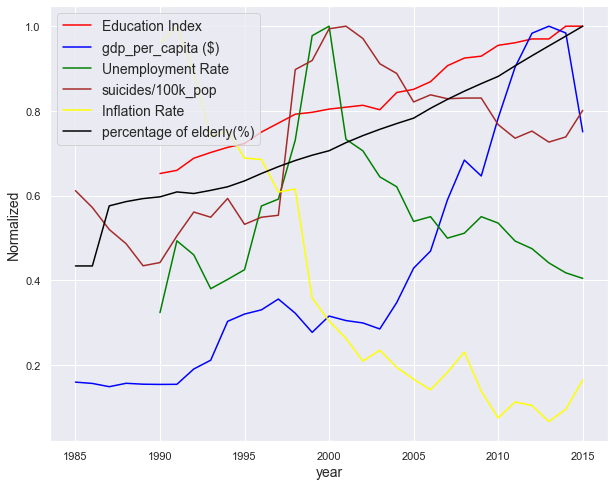

In [25]:
plt.figure(figsize=(10, 8))

plt.plot(colombia['year'], colombia['Education Index']/colombia['Education Index'].max(), color='red')
plt.plot(colombia['year'], colombia['gdp_per_capita ($)']/colombia['gdp_per_capita ($)'].max(), color='blue')
plt.plot(colombia['year'], colombia['Unemployment Rate']/colombia['Unemployment Rate'].max(), color='green')
plt.plot(colombia['year'], colombia['suicides/100k_pop']/colombia['suicides/100k_pop'].max(), color='brown')
plt.plot(colombia['year'], colombia['Inflation Rate']/colombia['Inflation Rate'].max(), color='yellow')
plt.plot(colombia['year'], colombia['percentage of elderly(%)']/colombia['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

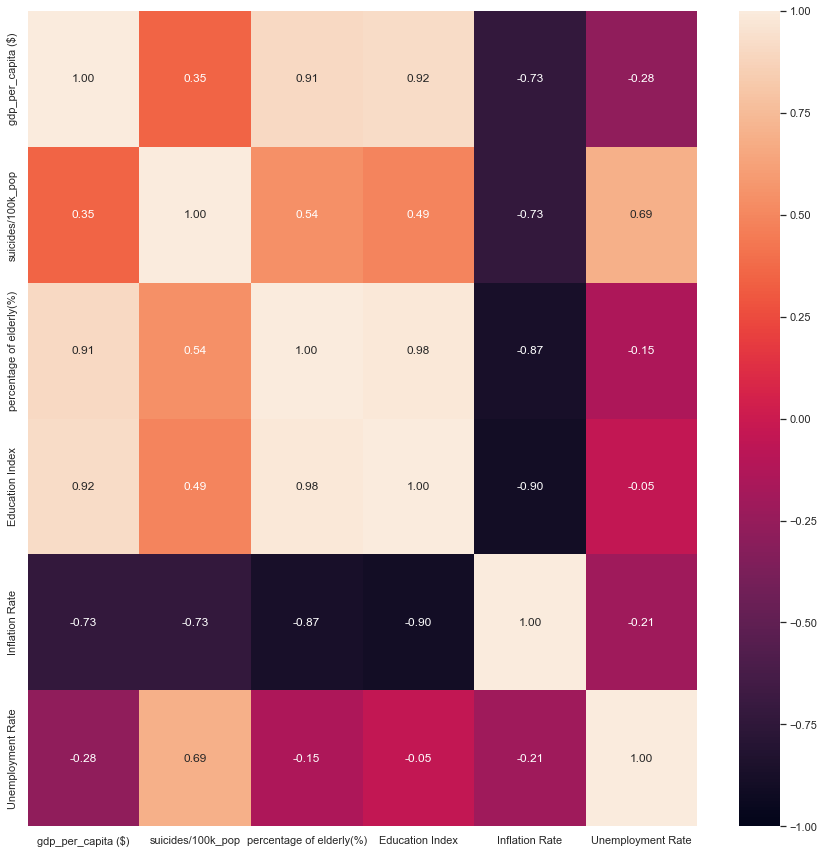

In [26]:
colombia['Education Index'] = colombia['Education Index']/colombia['Education Index'].max()
colombia['gdp_per_capita ($)'] = colombia['gdp_per_capita ($)']/colombia['gdp_per_capita ($)'].max()
colombia['Unemployment Rate'] = colombia['Unemployment Rate']/colombia['Unemployment Rate'].max()
colombia['suicides/100k_pop'] = colombia['suicides/100k_pop']/colombia['suicides/100k_pop'].max()
colombia['Inflation Rate'] = colombia['Inflation Rate']/colombia['Inflation Rate'].max()
colombia['percentage of elderly(%)'] = colombia['percentage of elderly(%)']/colombia['percentage of elderly(%)'].max()

colombia.drop('year', inplace=True, axis=1)
colombia.drop('Total_Population', inplace=True, axis=1)
colombia.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(colombia.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Ecuador

Text(0.5, 0, 'year')

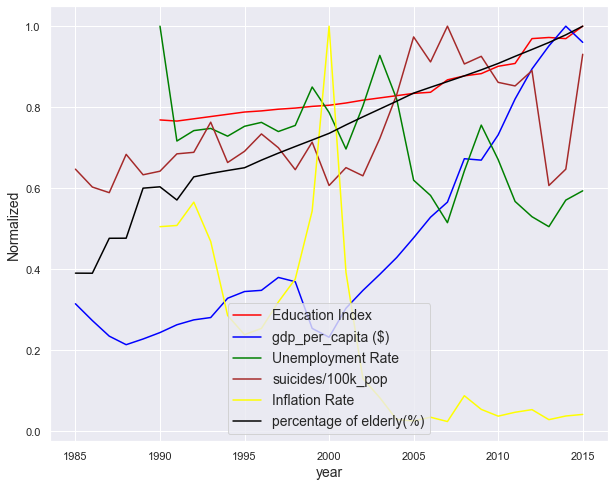

In [27]:
plt.figure(figsize=(10, 8))

plt.plot(ecuador['year'], ecuador['Education Index']/ecuador['Education Index'].max(), color='red')
plt.plot(ecuador['year'], ecuador['gdp_per_capita ($)']/ecuador['gdp_per_capita ($)'].max(), color='blue')
plt.plot(ecuador['year'], ecuador['Unemployment Rate']/ecuador['Unemployment Rate'].max(), color='green')
plt.plot(ecuador['year'], ecuador['suicides/100k_pop']/ecuador['suicides/100k_pop'].max(), color='brown')
plt.plot(ecuador['year'], ecuador['Inflation Rate']/ecuador['Inflation Rate'].max(), color='yellow')
plt.plot(ecuador['year'], ecuador['percentage of elderly(%)']/ecuador['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

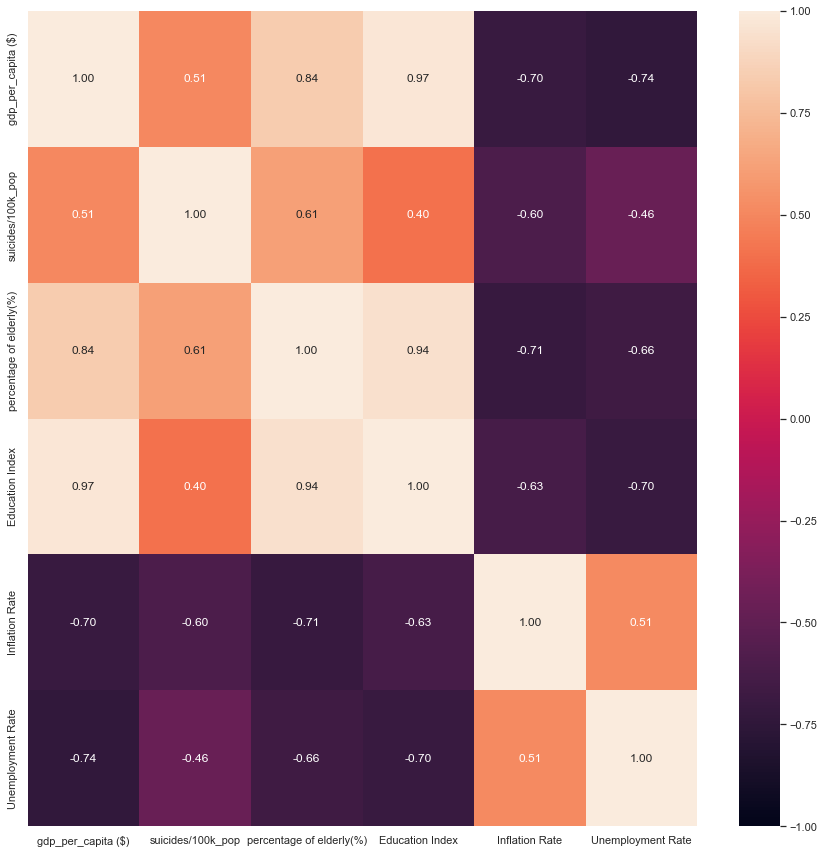

In [28]:
ecuador['Education Index'] = ecuador['Education Index']/ecuador['Education Index'].max()
ecuador['gdp_per_capita ($)'] = ecuador['gdp_per_capita ($)']/ecuador['gdp_per_capita ($)'].max()
ecuador['Unemployment Rate'] = ecuador['Unemployment Rate']/ecuador['Unemployment Rate'].max()
ecuador['suicides/100k_pop'] = ecuador['suicides/100k_pop']/ecuador['suicides/100k_pop'].max()
ecuador['Inflation Rate'] = ecuador['Inflation Rate']/ecuador['Inflation Rate'].max()
ecuador['percentage of elderly(%)'] = ecuador['percentage of elderly(%)']/ecuador['percentage of elderly(%)'].max()

ecuador.drop('year', inplace=True, axis=1)
ecuador.drop('Total_Population', inplace=True, axis=1)
ecuador.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(ecuador.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, GDP per capita and percentage of elderly have a positive correlation with suicide rates. On the other hand, unemployment rate and inflation rate have a negative correlation with suicide rates.

#### Sri Lanka

Text(0.5, 0, 'year')

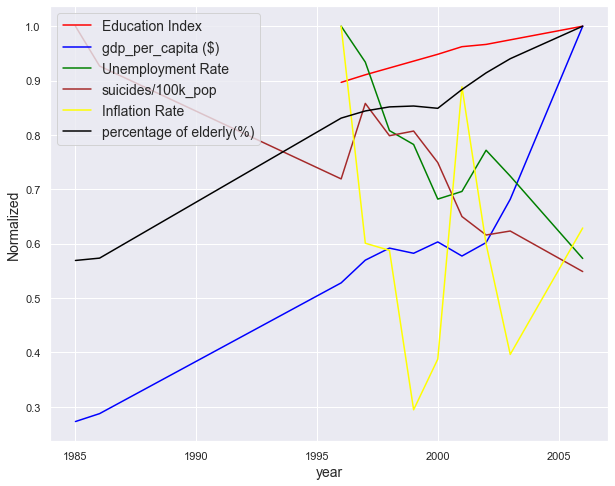

In [29]:
plt.figure(figsize=(10, 8))

plt.plot(sri_lanka['year'], sri_lanka['Education Index']/sri_lanka['Education Index'].max(), color='red')
plt.plot(sri_lanka['year'], sri_lanka['gdp_per_capita ($)']/sri_lanka['gdp_per_capita ($)'].max(), color='blue')
plt.plot(sri_lanka['year'], sri_lanka['Unemployment Rate']/sri_lanka['Unemployment Rate'].max(), color='green')
plt.plot(sri_lanka['year'], sri_lanka['suicides/100k_pop']/sri_lanka['suicides/100k_pop'].max(), color='brown')
plt.plot(sri_lanka['year'], sri_lanka['Inflation Rate']/sri_lanka['Inflation Rate'].max(), color='yellow')
plt.plot(sri_lanka['year'], sri_lanka['percentage of elderly(%)']/sri_lanka['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

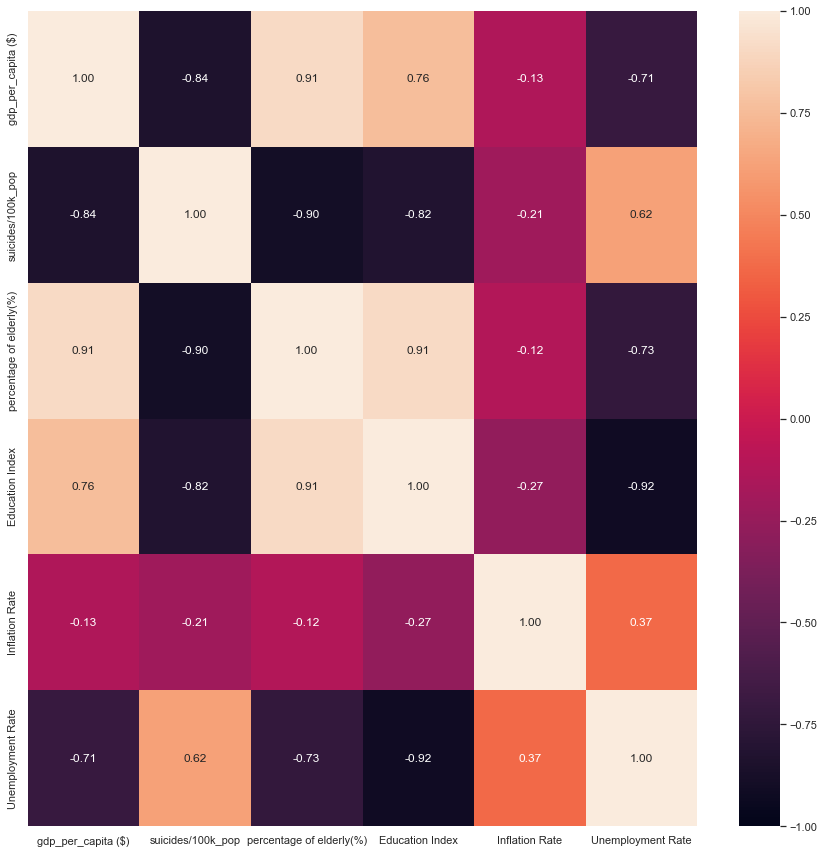

In [30]:
sri_lanka['Education Index'] = sri_lanka['Education Index']/sri_lanka['Education Index'].max()
sri_lanka['gdp_per_capita ($)'] = sri_lanka['gdp_per_capita ($)']/sri_lanka['gdp_per_capita ($)'].max()
sri_lanka['Unemployment Rate'] = sri_lanka['Unemployment Rate']/sri_lanka['Unemployment Rate'].max()
sri_lanka['suicides/100k_pop'] = sri_lanka['suicides/100k_pop']/sri_lanka['suicides/100k_pop'].max()
sri_lanka['Inflation Rate'] = sri_lanka['Inflation Rate']/sri_lanka['Inflation Rate'].max()
sri_lanka['percentage of elderly(%)'] = sri_lanka['percentage of elderly(%)']/sri_lanka['percentage of elderly(%)'].max()

sri_lanka.drop('year', inplace=True, axis=1)
sri_lanka.drop('Total_Population', inplace=True, axis=1)
sri_lanka.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(sri_lanka.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, GDP per capita, Education Index and percentage of elderly have the strongest negative correlation with suicide rates out of all the other factors. On the other hand, unemployment rate have a positive correlation with suicide rates.

#### Korea

Text(0.5, 0, 'year')

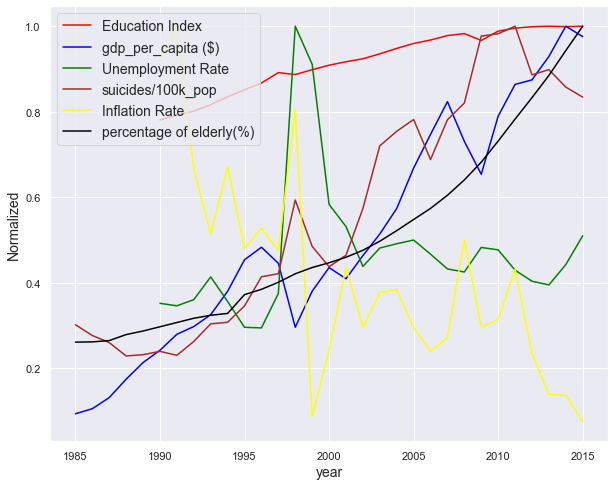

In [31]:
plt.figure(figsize=(10, 8))

plt.plot(korea['year'], korea['Education Index']/korea['Education Index'].max(), color='red')
plt.plot(korea['year'], korea['gdp_per_capita ($)']/korea['gdp_per_capita ($)'].max(), color='blue')
plt.plot(korea['year'], korea['Unemployment Rate']/korea['Unemployment Rate'].max(), color='green')
plt.plot(korea['year'], korea['suicides/100k_pop']/korea['suicides/100k_pop'].max(), color='brown')
plt.plot(korea['year'], korea['Inflation Rate']/korea['Inflation Rate'].max(), color='yellow')
plt.plot(korea['year'], korea['percentage of elderly(%)']/korea['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

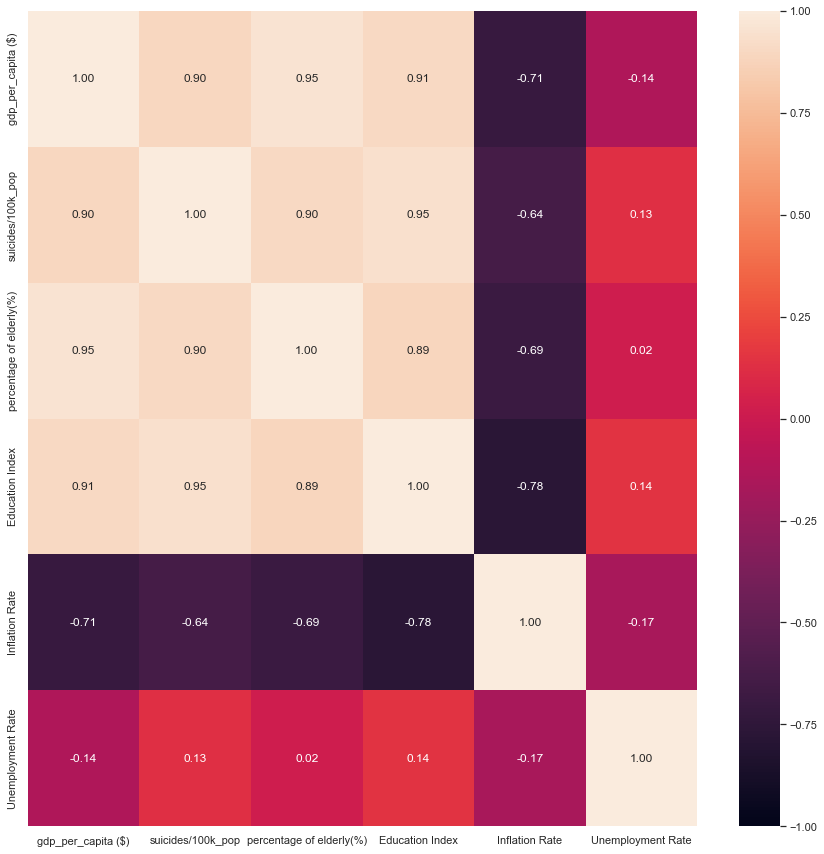

In [32]:
korea['Education Index'] = korea['Education Index']/korea['Education Index'].max()
korea['gdp_per_capita ($)'] = korea['gdp_per_capita ($)']/korea['gdp_per_capita ($)'].max()
korea['Unemployment Rate'] = korea['Unemployment Rate']/korea['Unemployment Rate'].max()
korea['suicides/100k_pop'] = korea['suicides/100k_pop']/korea['suicides/100k_pop'].max()
korea['Inflation Rate'] = korea['Inflation Rate']/korea['Inflation Rate'].max()
korea['percentage of elderly(%)'] = korea['percentage of elderly(%)']/korea['percentage of elderly(%)'].max()

korea.drop('year', inplace=True, axis=1)
korea.drop('Total_Population', inplace=True, axis=1)
korea.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(korea.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, GDP per capita, Education Index and percentage of elderly have the strongest positive correlation with suicide rates out of all the other factors. On the other hand, inflation rate have a negative relationship with suicide rates.

#### Singapore

Text(0.5, 0, 'year')

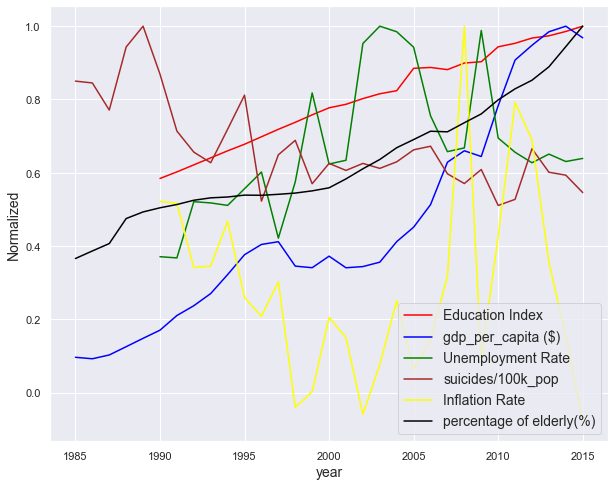

In [33]:
plt.figure(figsize=(10, 8))

plt.plot(singapore['year'], singapore['Education Index']/singapore['Education Index'].max(), color='red')
plt.plot(singapore['year'], singapore['gdp_per_capita ($)']/singapore['gdp_per_capita ($)'].max(), color='blue')
plt.plot(singapore['year'], singapore['Unemployment Rate']/singapore['Unemployment Rate'].max(), color='green')
plt.plot(singapore['year'], singapore['suicides/100k_pop']/singapore['suicides/100k_pop'].max(), color='brown')
plt.plot(singapore['year'], singapore['Inflation Rate']/singapore['Inflation Rate'].max(), color='yellow')
plt.plot(singapore['year'], singapore['percentage of elderly(%)']/singapore['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

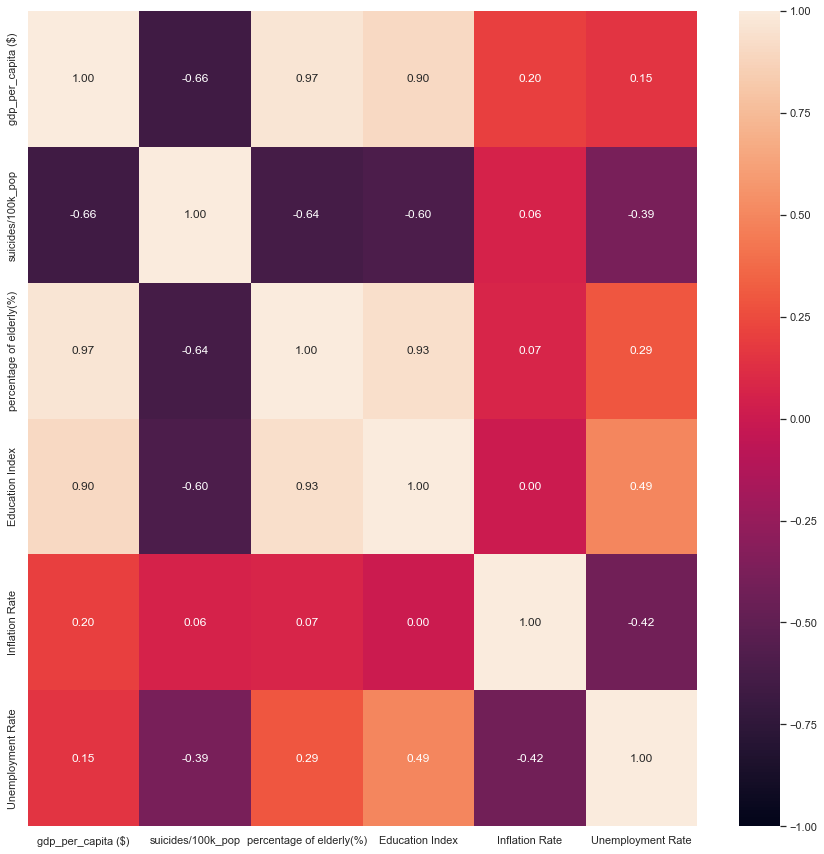

In [34]:
singapore['Education Index'] = singapore['Education Index']/singapore['Education Index'].max()
singapore['gdp_per_capita ($)'] = singapore['gdp_per_capita ($)']/singapore['gdp_per_capita ($)'].max()
singapore['Unemployment Rate'] = singapore['Unemployment Rate']/singapore['Unemployment Rate'].max()
singapore['suicides/100k_pop'] = singapore['suicides/100k_pop']/singapore['suicides/100k_pop'].max()
singapore['Inflation Rate'] = singapore['Inflation Rate']/singapore['Inflation Rate'].max()
singapore['percentage of elderly(%)'] = singapore['percentage of elderly(%)']/singapore['percentage of elderly(%)'].max()

singapore.drop('year', inplace=True, axis=1)
singapore.drop('Total_Population', inplace=True, axis=1)
singapore.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(singapore.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, GDP per capita, Education Index and percentage of elderly have the strongest positive correlation with suicide rates out of all the other factors. On the other hand, unemployment rate and inflation rate does not seem to have a relationship with suicide rates.

#### South Africa

Text(0.5, 0, 'year')

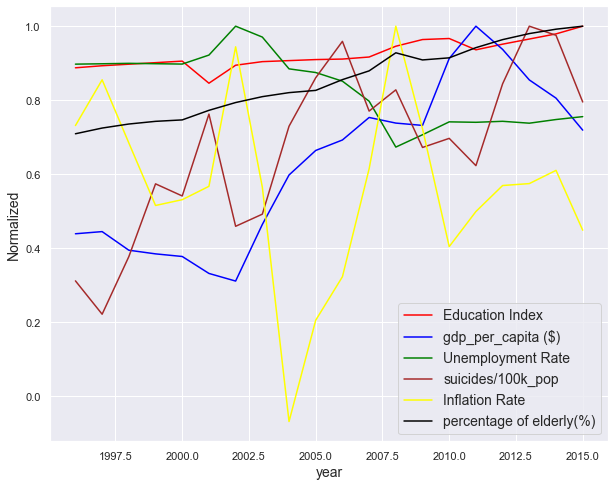

In [35]:
plt.figure(figsize=(10, 8))

plt.plot(south_africa['year'], south_africa['Education Index']/south_africa['Education Index'].max(), color='red')
plt.plot(south_africa['year'], south_africa['gdp_per_capita ($)']/south_africa['gdp_per_capita ($)'].max(), color='blue')
plt.plot(south_africa['year'], south_africa['Unemployment Rate']/south_africa['Unemployment Rate'].max(), color='green')
plt.plot(south_africa['year'], south_africa['suicides/100k_pop']/south_africa['suicides/100k_pop'].max(), color='brown')
plt.plot(south_africa['year'], south_africa['Inflation Rate']/south_africa['Inflation Rate'].max(), color='yellow')
plt.plot(south_africa['year'], south_africa['percentage of elderly(%)']/south_africa['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

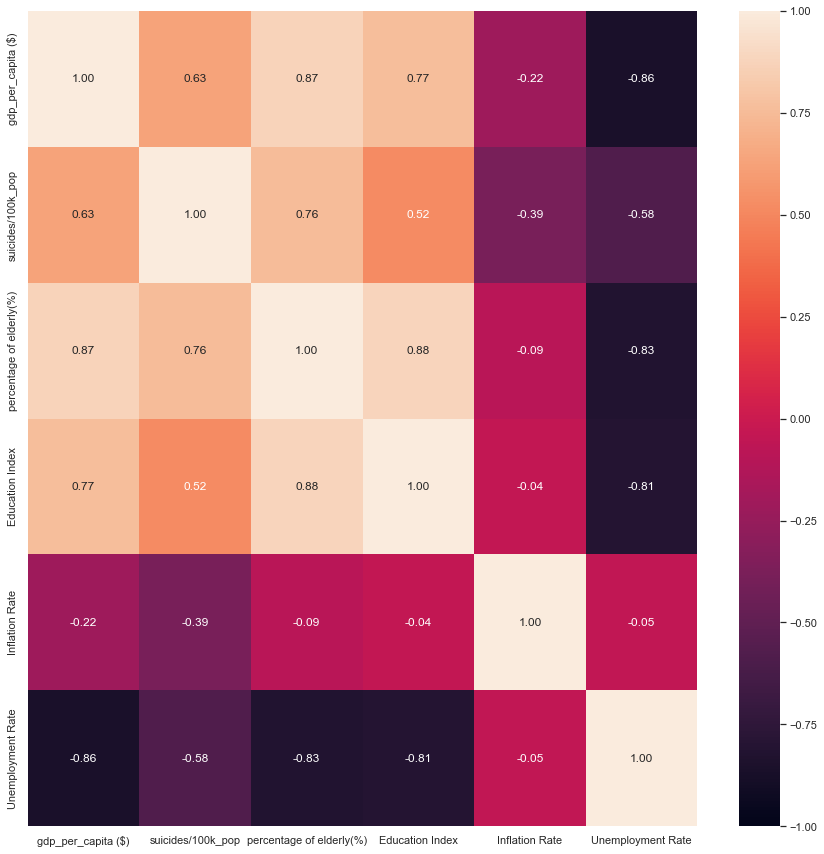

In [36]:
south_africa['Education Index'] = south_africa['Education Index']/south_africa['Education Index'].max()
south_africa['gdp_per_capita ($)'] = south_africa['gdp_per_capita ($)']/south_africa['gdp_per_capita ($)'].max()
south_africa['Unemployment Rate'] = south_africa['Unemployment Rate']/south_africa['Unemployment Rate'].max()
south_africa['suicides/100k_pop'] = south_africa['suicides/100k_pop']/south_africa['suicides/100k_pop'].max()
south_africa['Inflation Rate'] = south_africa['Inflation Rate']/south_africa['Inflation Rate'].max()
south_africa['percentage of elderly(%)'] = south_africa['percentage of elderly(%)']/south_africa['percentage of elderly(%)'].max()

south_africa.drop('year', inplace=True, axis=1)
south_africa.drop('Total_Population', inplace=True, axis=1)
south_africa.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(south_africa.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, GDP per capita and percentage of elderly have the strongest positive correlation with suicide rates out of all the other factors. On the other hand, unemployment rate and inflation rate have a negative relationship with suicide rates, although not very strong.

#### Sweden

Text(0.5, 0, 'year')

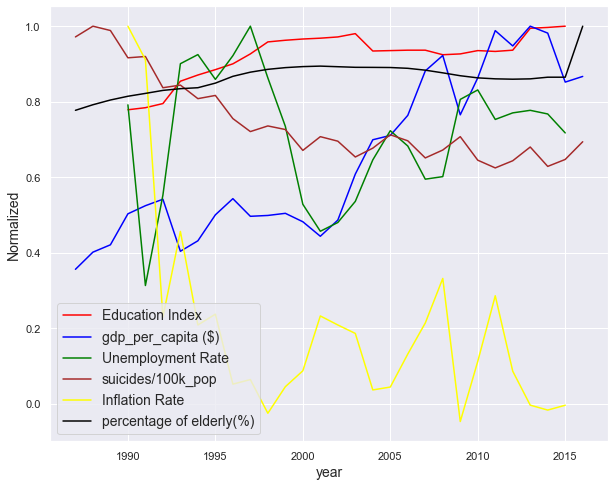

In [37]:
plt.figure(figsize=(10, 8))

plt.plot(sweden['year'], sweden['Education Index']/sweden['Education Index'].max(), color='red')
plt.plot(sweden['year'], sweden['gdp_per_capita ($)']/sweden['gdp_per_capita ($)'].max(), color='blue')
plt.plot(sweden['year'], sweden['Unemployment Rate']/sweden['Unemployment Rate'].max(), color='green')
plt.plot(sweden['year'], sweden['suicides/100k_pop']/sweden['suicides/100k_pop'].max(), color='brown')
plt.plot(sweden['year'], sweden['Inflation Rate']/sweden['Inflation Rate'].max(), color='yellow')
plt.plot(sweden['year'], sweden['percentage of elderly(%)']/sweden['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

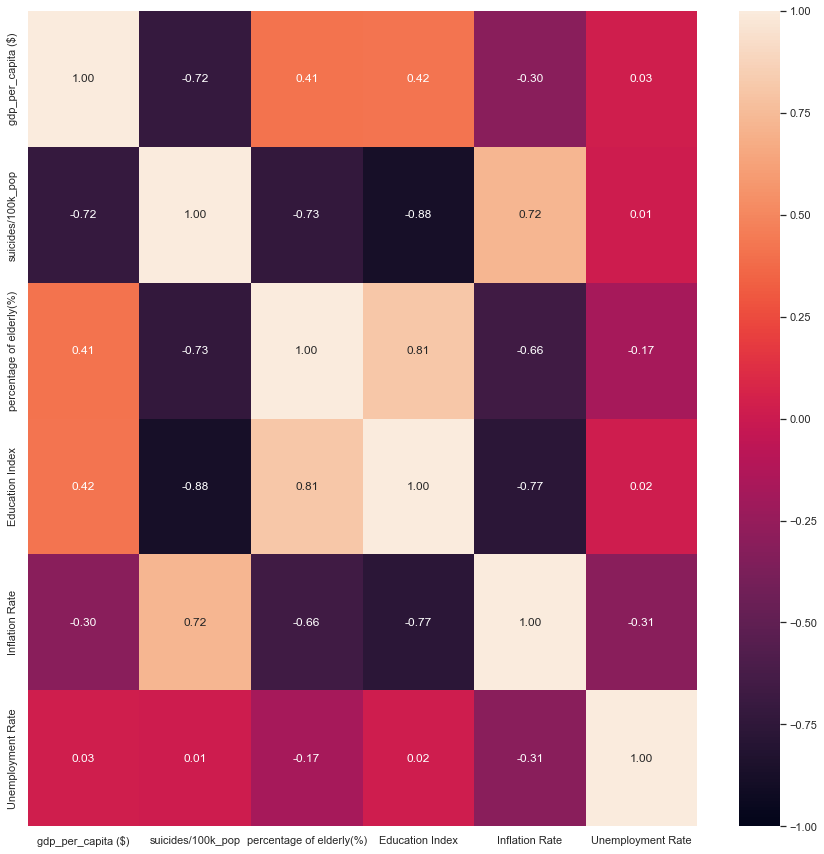

In [38]:
sweden['Education Index'] = sweden['Education Index']/sweden['Education Index'].max()
sweden['gdp_per_capita ($)'] = sweden['gdp_per_capita ($)']/sweden['gdp_per_capita ($)'].max()
sweden['Unemployment Rate'] = sweden['Unemployment Rate']/sweden['Unemployment Rate'].max()
sweden['suicides/100k_pop'] = sweden['suicides/100k_pop']/sweden['suicides/100k_pop'].max()
sweden['Inflation Rate'] = sweden['Inflation Rate']/sweden['Inflation Rate'].max()
sweden['percentage of elderly(%)'] = sweden['percentage of elderly(%)']/sweden['percentage of elderly(%)'].max()

sweden.drop('year', inplace=True, axis=1)
sweden.drop('Total_Population', inplace=True, axis=1)
sweden.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(sweden.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, GDP per capita, Education Index and percentage of elderly have a strong negative correlation with suicide rates. On the other hand, inflation rate have a strong positive with suicide rates.

#### UK

Text(0.5, 0, 'year')

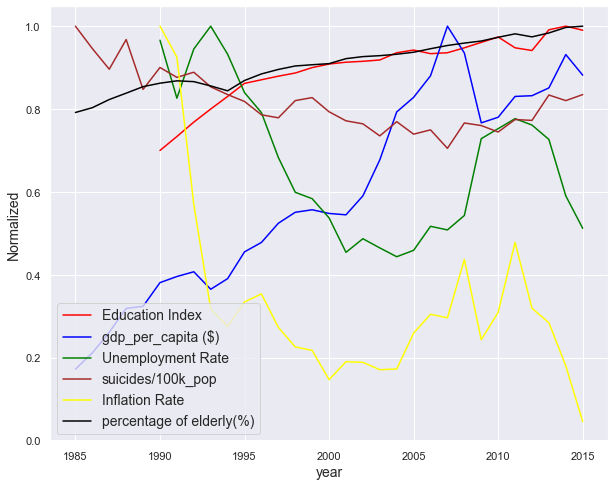

In [39]:
plt.figure(figsize=(10, 8))

plt.plot(UK['year'], UK['Education Index']/UK['Education Index'].max(), color='red')
plt.plot(UK['year'], UK['gdp_per_capita ($)']/UK['gdp_per_capita ($)'].max(), color='blue')
plt.plot(UK['year'], UK['Unemployment Rate']/UK['Unemployment Rate'].max(), color='green')
plt.plot(UK['year'], UK['suicides/100k_pop']/UK['suicides/100k_pop'].max(), color='brown')
plt.plot(UK['year'], UK['Inflation Rate']/UK['Inflation Rate'].max(), color='yellow')
plt.plot(UK['year'], UK['percentage of elderly(%)']/UK['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

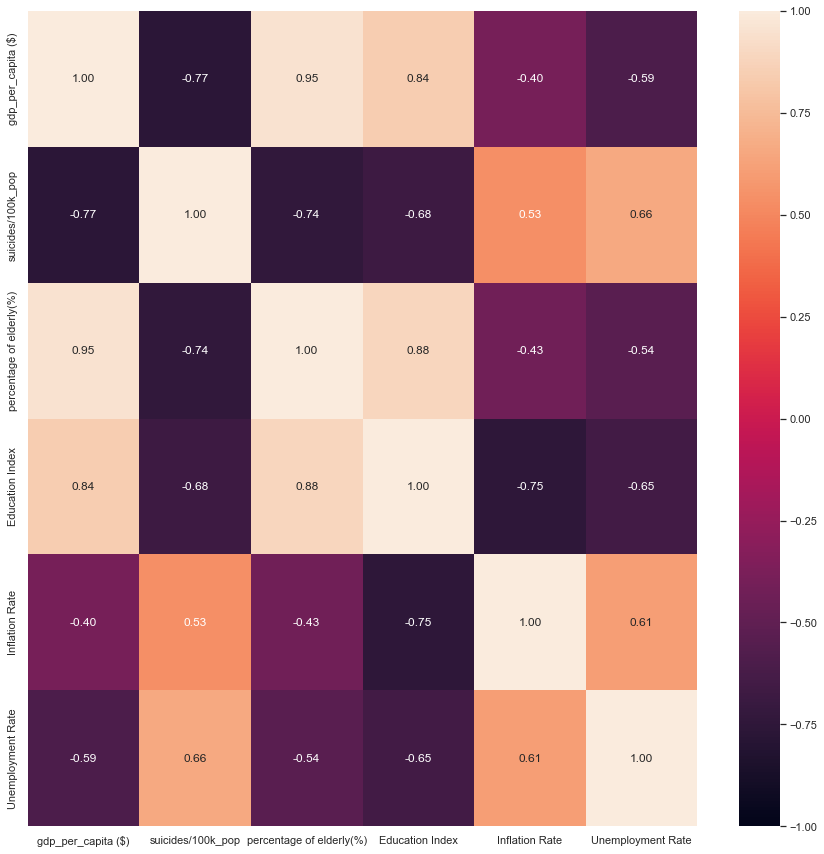

In [40]:
UK['Education Index'] = UK['Education Index']/UK['Education Index'].max()
UK['gdp_per_capita ($)'] = UK['gdp_per_capita ($)']/UK['gdp_per_capita ($)'].max()
UK['Unemployment Rate'] = UK['Unemployment Rate']/UK['Unemployment Rate'].max()
UK['suicides/100k_pop'] = UK['suicides/100k_pop']/UK['suicides/100k_pop'].max()
UK['Inflation Rate'] = UK['Inflation Rate']/UK['Inflation Rate'].max()
UK['percentage of elderly(%)'] = UK['percentage of elderly(%)']/UK['percentage of elderly(%)'].max()

UK.drop('year', inplace=True, axis=1)
UK.drop('Total_Population', inplace=True, axis=1)
UK.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(UK.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, GDP per capita and percentage of elderly have strong negative correlation with suicide rates. On the other hand, unemployment rate and inflation rate have a positive with suicide rates.

#### USA

Text(0.5, 0, 'year')

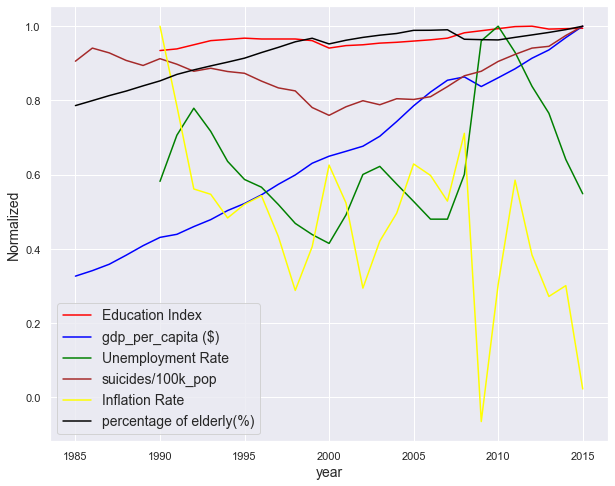

In [41]:
plt.figure(figsize=(10, 8))

plt.plot(USA['year'], USA['Education Index']/USA['Education Index'].max(), color='red')
plt.plot(USA['year'], USA['gdp_per_capita ($)']/USA['gdp_per_capita ($)'].max(), color='blue')
plt.plot(USA['year'], USA['Unemployment Rate']/USA['Unemployment Rate'].max(), color='green')
plt.plot(USA['year'], USA['suicides/100k_pop']/USA['suicides/100k_pop'].max(), color='brown')
plt.plot(USA['year'], USA['Inflation Rate']/USA['Inflation Rate'].max(), color='yellow')
plt.plot(USA['year'], USA['percentage of elderly(%)']/USA['percentage of elderly(%)'].max(), color='black')

plt.legend(['Education Index','gdp_per_capita ($)','Unemployment Rate','suicides/100k_pop','Inflation Rate','percentage of elderly(%)'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

<AxesSubplot:>

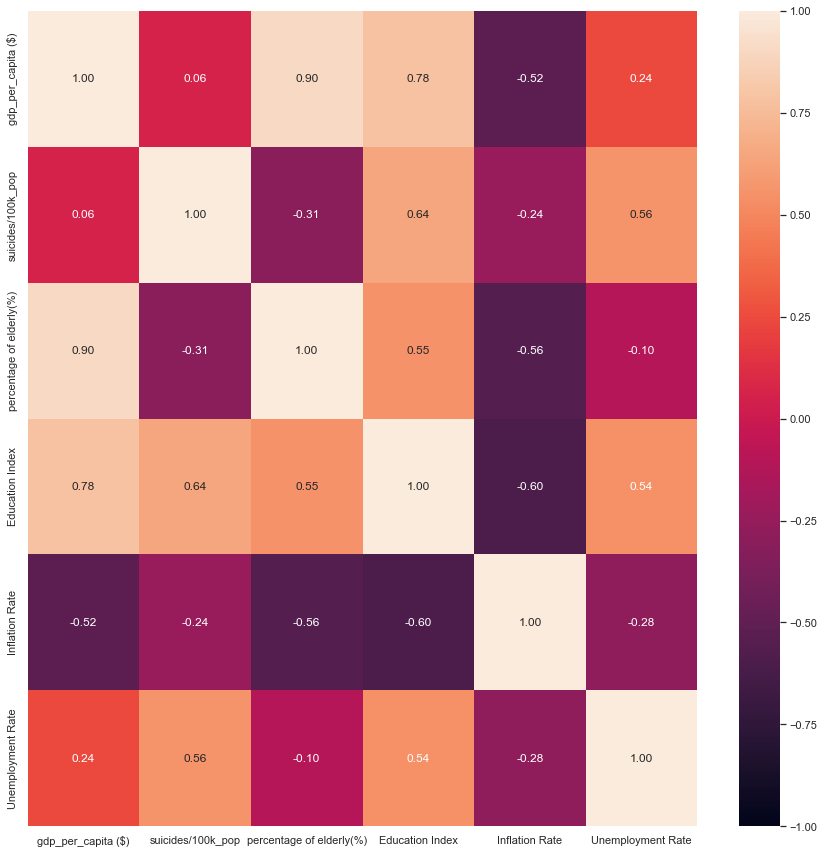

In [42]:
USA['Education Index'] = USA['Education Index']/USA['Education Index'].max()
USA['gdp_per_capita ($)'] = USA['gdp_per_capita ($)']/USA['gdp_per_capita ($)'].max()
USA['Unemployment Rate'] = USA['Unemployment Rate']/USA['Unemployment Rate'].max()
USA['suicides/100k_pop'] = USA['suicides/100k_pop']/USA['suicides/100k_pop'].max()
USA['Inflation Rate'] = USA['Inflation Rate']/USA['Inflation Rate'].max()
USA['percentage of elderly(%)'] = USA['percentage of elderly(%)']/USA['percentage of elderly(%)'].max()

USA.drop('year', inplace=True, axis=1)
USA.drop('Total_Population', inplace=True, axis=1)
USA.drop('suicides_no', inplace=True, axis=1)

f = plt.figure(figsize=(15,15))
sb.heatmap(USA.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

#### Analysis of data
Based off the graph and heatmap, Education Index and unemployment rate have the strongest correlation with suicide rates out of all the other factors. On the other hand, the other factors does not seem to have a relationship with suicide rates.

With all the inferences made, we will try to create a model to see which factors are the most significant.